# Ведение

 Нам предстоит просмотреть, обработать и иследовать открытые данные о компьютерных играх. Понять, на что потратить рекламный бюджет. В исследовании необходимо проанализированы игры с разных сторон:Понять какие жанры в каких регионах привлекательнее, Как влияют на продажи отзывы критиков и пользователей. Как влияют на продажи рейтинг от организации ESRB.

## Шаг 1. Чтение данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sas
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 40)

In [4]:
data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.duplicated().sum()

0

In [6]:
data.groupby(['Name', 'Platform', 'Year_of_Release'])['Name'].count().sort_values(ascending=False).head()

Name                        Platform  Year_of_Release
Madden NFL 13               PS3       2012.0             2
 Beyblade Burst             3DS       2016.0             1
Ratatouille                 PC        2007.0             1
Rapala Tournament Fishing!  X360      2006.0             1
Rapala Trophies             PSP       2006.0             1
Name: Name, dtype: int64

In [7]:
data[data['Name'] == 'Madden NFL 13']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [8]:
len(data)

16715

In [9]:
data = data[~((data['Name'] == 'Madden NFL 13') & (data['Platform'] == 'PS3') & (data['Year_of_Release'] == 2012.0) & (data['EU_sales'] == 0.01))]

In [10]:
len(data)

16714

In [11]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [12]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016094
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513222
User_Score         0.400921
Rating             0.404810
dtype: float64

In [13]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16445.000000,16714.000000,16714.000000,16714.000000,16714.000000,8136.000000
mean,2006.484281,0.263393,0.145068,0.077622,0.047345,68.965954
std,5.877071,0.813625,0.503352,0.308862,0.186736,13.938153
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


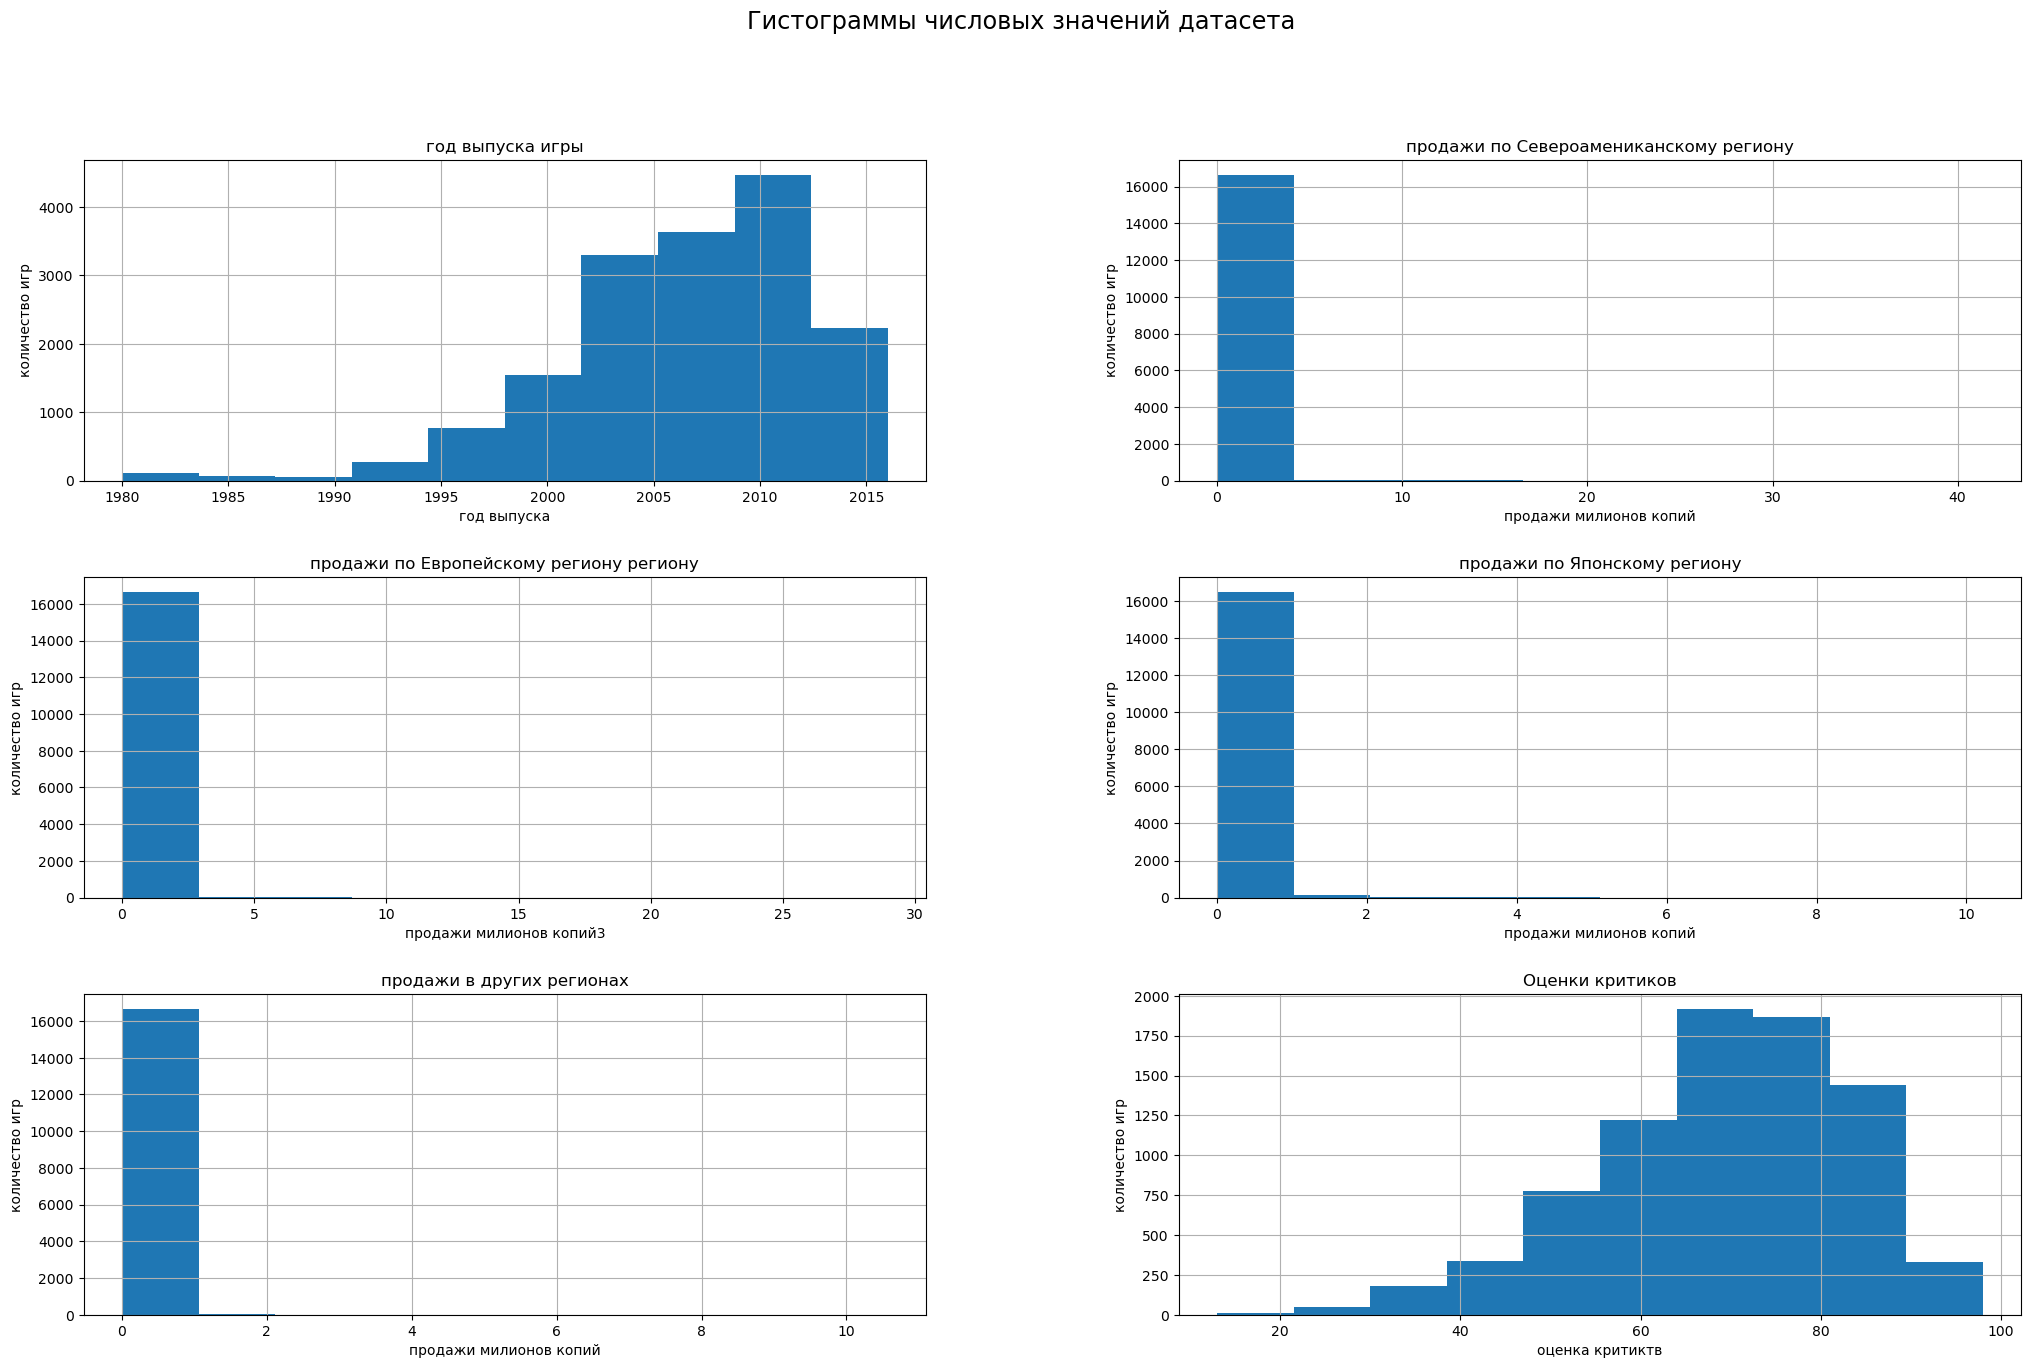

In [14]:
axes = data.hist(figsize = (25,15))
axes[0,0].set_title('год выпуска игры')
axes[0,0].set_xlabel('год выпуска')
axes[0,0].set_ylabel('количество игр')

axes[0,1].set_title('продажи по Североамениканскому региону')
axes[0,1].set_xlabel('продажи милионов копий')
axes[0,1].set_ylabel('количество игр')

axes[1,0].set_title('продажи по Европейскому региону региону')
axes[1,0].set_xlabel('продажи милионов копий3')
axes[1,0].set_ylabel('количество игр')

axes[1,1].set_title('продажи по Японскому региону')
axes[1,1].set_xlabel('продажи милионов копий')
axes[1,1].set_ylabel('количество игр')

axes[2,0].set_title('продажи в других регионах')
axes[2,0].set_xlabel('продажи милионов копий')
axes[2,0].set_ylabel('количество игр')

axes[2,1].set_title('Оценки критиков')
axes[2,1].set_xlabel('оценка критиктв')
axes[2,1].set_ylabel('количество игр')


plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

Информация в проекте представлена следующим файлом: "games.csv"

таблица представлена 16714 строками и 11 столбцами:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

в таблице нет явных дублекатов, но есть пропуски в столбцах "Name" и "Genre" по 2 пропуска, в строке "Year_of_Release" 269 пропусков и больше всего пропусков в строках: "Critic_Score", "User_Score" и "Rating". Их количество равно: 8578, 6701 и 6766 соответственно. В именах столббцов присутствуют заглавные буквы. Столбци "Year_of_Release" и "User_Score" не соответствуют своему типу данных. Также в таблице присутствовал 1 неявный дублекат строка № 16230 была удалена из датасета

## Шаг 2. Подготовьте данные

### Корректировка названий столбцов


In [16]:
list(data.columns.values)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [17]:
data = data.rename(columns={'Name': 'name',                        
                            'Platform': 'platform',
                            'Year_of_Release': 'year_of_release',
                            'Genre': 'genre',
                            'NA_sales': 'na_sales',
                            'EU_sales': 'eu_sales',
                            'JP_sales': 'jp_sales',
                            'Other_sales': 'other_sales',
                            'Critic_Score': 'critic_score',
                            'User_Score': 'user_score',
                            'Rating': 'rating',                            
                           })

In [18]:
list(data.columns.values)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

имена столбцов откорректированы

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

#### name

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [20]:
data.name.nunique()

11559

In [21]:
data[(data.name.duplicated())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M


In [22]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [23]:
data = data[~data.name.isna()]

In [24]:
data.genre.nunique()

12

In [25]:
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Тип данны в строке "name", "platform" и "genre" не нужно преобразовывать. Они соответствуют своему типу.

Были обнорцжены повторы в строке "name" , они связаны с тем, что были игры, которые выпускались на несколько платформ.

Удалены 2 строки, у которой почти все данные заполнены NaN.Так как считаю эти данные ошибкой не влияющей на исследование.

#### year_of_release

In [27]:
data.year_of_release.nunique()

37

In [28]:
data.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [29]:
data.year_of_release.isnull().sum()

269

In [30]:
data.loc[data.year_of_release.isnull(), 'year_of_release'] = -99999

в случае, если год выпуска игры незвестен, временно заменяю его на значение "-99999", для того чтобы поменять формат столбца но тип "int"

Поставил Заглушку потому, что боюсь потерять даже небольшую часть данных, так как в этих данных может хранится информация, которая нам в дальнейшем может пригодится.

In [31]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [32]:
data.year_of_release.unique()

array([  2006,   1985,   2008,   2009,   1996,   1989,   1984,   2005,
         1999,   2007,   2010,   2013,   2004,   1990,   1988,   2002,
         2001,   2011,   1998,   2015,   2012,   2014,   1992,   1997,
         1993,   1994,   1982,   2016,   2003,   1986,   2000, -99999,
         1995,   1991,   1981,   1987,   1980,   1983])

Столбец "year_of_release" имеет тип данных 'float'. Это связано с тем, что в ее данных есть пропуски, считаю это неправельным. Заменяю пропуски на "-99999" и изменяю тип данных на 'int'.

#### продажи

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбцах "na_sales", "eu_sales", "jp_sales" и "other_sales" соответствуют своему типу и не имеет пропусков

#### critic_score

In [34]:
data.critic_score.nunique()

82

In [35]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [36]:
data.critic_score.isna().sum()

8576

In [37]:
data["critic_score"] = data.groupby("name")['critic_score'].transform(lambda x: x.fillna(x.mean()))

После этой команды средний рейтинг каждой игры никак не поменялся, но у нас добавились 961 запись по средним рейтингам игр на разных платформах. Возможно в дальнейшем это чуть большее охарактеризует какуюто из не популярных платформ.

In [38]:
data.critic_score.isna().sum()

7615

In [39]:
8576-7615

961

частично заполнили недостающие значения средними значениями из их таких же игр, но с других платформ

In [40]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [41]:
data.critic_score.round().unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 42., 67., 81., 66., 56., 44., 79., 70.,
       59., 64., 75., 60., 63., 69., 50., 25., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 52., 38., 33., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [42]:
data.critic_score = data.critic_score.fillna(value=-99999).round()

In [43]:
data.critic_score = data.critic_score.astype('int')

в столбце "critic_score" пропуски частично заполннены средними значениями из их таких же игр, но с других платформ, а оставшиеся пропуски заменены на значение "-99999" и тип данных столбца изменен на "int"

#### user_score

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  int32  
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.4+ MB


In [45]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99999,NaN,NaN


In [46]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [47]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2424

In [48]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,42,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-99999,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-99999,Adventure,2.15,0.18,0.0,0.07,73,tbd,E


In [49]:
data[data.user_score.isnull()].name.count()

6699

In [50]:
data[data.user_score.isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99999,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-99999,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-99999,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-99999,NaN,NaN


In [51]:
data.loc[data['user_score'] == 0, 'user_score'].count()

0

In [52]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

Временно заменили все данные со значением "tbd" на данные со значением "0". таких данных получилос на 1 ед. больше, но это не отразится на итоговых результатах

In [53]:
data['user_score'] = data['user_score'].astype('float')

In [54]:
data.loc[data['user_score'] == 0, 'user_score'].count()

2425

In [55]:
data[data.user_score.isna()].name.count()

6699

In [56]:
data.user_score.unique()
data.user_score = data.user_score * 10

In [57]:
data["user_score"] = data.groupby("name")['user_score'].transform(lambda x: x.fillna(x.mean()))

In [58]:
data[data.user_score.isna()].name.count()

6270

частично заменили пропущенные значения на средние значения этой игры на других платформах

In [59]:
data.user_score = data.user_score.fillna(value=-99999)

In [60]:
data.loc[data['user_score'] == 0, 'user_score'] = -88888

Зделал разные заглушки для того, чтобы было возможно в будующем отдельно отследить откуда взялась ошибка tbd, а откуда пропуски.

In [61]:
data['user_score'] = data['user_score'].astype('int')

In [62]:
data.user_score.nunique()

96

In [63]:
data.user_score.unique()

array([    80, -99999,     83,     85,     66,     84,     86,     77,
           63,     74,     82,     90,     79,     81,     87,     71,
           34,     53,     48,     32,     89,     64,     78,     75,
           26,     72,     92,     70,     73,     43,     76,     57,
           50,     91,     65, -88888,     88,     69,     94,     68,
           61,     67,     54,     40,     42,     49,     45,     93,
           62,     60,     37,     41,     58,     56,     55,     44,
           46,     59,     39,     31,     29,     52,     33,     22,
           47,     51,     35,     25,     19,     30,     27,     20,
           95,     21,     36,     97,     28,     18,     38,     16,
           96,     24,     17,     11,      3,     23,     15,      7,
           12,      5,     13,      2,      6,     14,      9,     10])

In [64]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,-99999,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99999,-99999,NaN


в строке "user_score" пропущеные значения били частично заменены на средние значения игры на других платформах, если таких игр не быо,то значения были изменены  на значение "-99999", также были найдены 2424 значения "tbd". Преддполагаю, что это значение ошибочное, и так как в столбце "user_score" дискретные математические значения, мной было принято решение заменить значение "tbd" на значение "-88888". А также произведя матиматические действия измененить тип столбца на тип "int", для возможности использования данных в арифмитеческих выражениях.

#### rating

In [65]:
data.rating.nunique()

8

In [66]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [67]:
data.rating = data.rating.fillna(value='no_rating')

In [68]:
data[data['rating'] == 'no_rating'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,-99999,no_rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99999,-99999,no_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-99999,-99999,no_rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-99999,-99999,no_rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-99999,-99999,no_rating


In [69]:
data.rating.unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В строке "rating" содержатся данные тиа "str" и есть пропуски. Пропуски заменили на значение "no_rating"

### Обработайте пропуски при необходимости:

#### Причины заполнения пропусков

Были удалены 2 строки с практически полность отсутствующими данными, так как узнать о какой информации шла речь невозможно.
В столбцах "critic_score" и "user_score" отсутствующие значения были заполнены средним значением игры на других платформах, а если таких игр не было, то заменены значением "-99999", для того чтобы можно было эти данные легко найти и отфильтровать и с оставшимися данными в столбцах можно было производить расчеты. Не заполнял эти данные не мидианными не средними значениями, так как от этих данным может меняться мнение об игре. 
Недастающие данные в столбце "rating" заменены на значение "no_rating", , предполагаю, что в эти игры можно играть всем, но в расчетах по рейтингу эти данные использоватся не будут

#### предположение о появлении пропусков

так как данные брались из открытых источников, возможно некоторые данные в этих источника отсутствовари, поэтому в таких данных имеются пропуски.

#### 'tbd' в столбце с оценкой пользователей
 

Было найдено 2424 значения "tbd". Происхождение этой ошибки неизвесно, было принято заменить значение на "-88888", чтобы можно было легко эти значения отфильтровать и иследовать.А с данными можно было производить математические операции.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [70]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [71]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,-99999,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99999,-99999,no_rating,31.38


In [72]:
data.total_sales.isna().sum()

0

добавили столбец "total_sales" в котором посчитали выручку со всех регионов

In [73]:

temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  int32  
 9   user_score       16712 non-null  int32  
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(5), int32(3), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

## Шаг 3. Проведите исследовательский анализ данных


### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


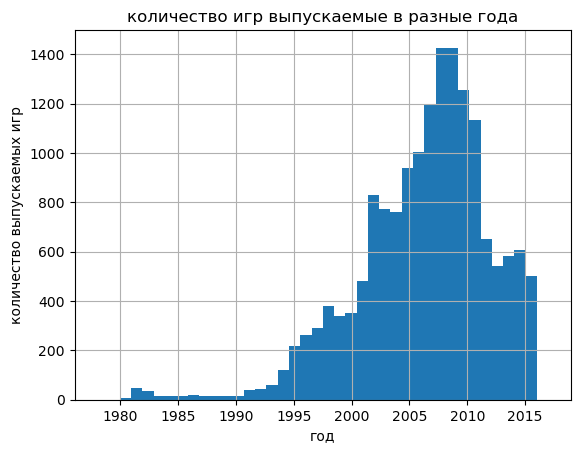

In [74]:
data.year_of_release.hist(bins=40, range=(1978, 2017))
plt.title("количество игр выпускаемые в разные года")
plt.xlabel("год")
plt.ylabel("количество выпускаемых игр")
plt.show()

In [75]:
data.year_of_release.value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
        ... 
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, Length: 38, dtype: int64

In [76]:
data.year_of_release.value_counts(normalize=True)

2008    0.085388
2009    0.085328
2010    0.075096
2007    0.071625
2011    0.067975
          ...   
1987    0.000957
1988    0.000898
1985    0.000838
1984    0.000838
1980    0.000539
Name: year_of_release, Length: 38, dtype: float64

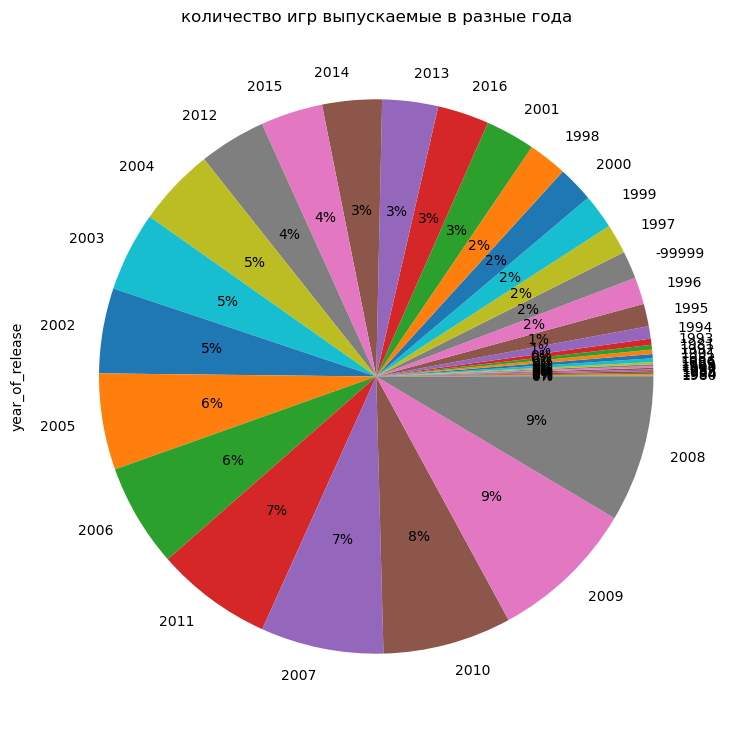

In [77]:
data.year_of_release.value_counts(normalize=True).sort_values().plot(kind='pie', figsize=(15, 9), autopct='%1.0f%%')
plt.title("количество игр выпускаемые в разные года")
plt.show()

In [78]:
(data['year_of_release'] < 0).sum()

269

In [79]:
data_clean = data[data['year_of_release'] > 0]

Создаем датасет без данных о играх в которых не указана дата выпуска. В эти данные не попала информация о 269 играх

In [80]:
data_clean.year_of_release.describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

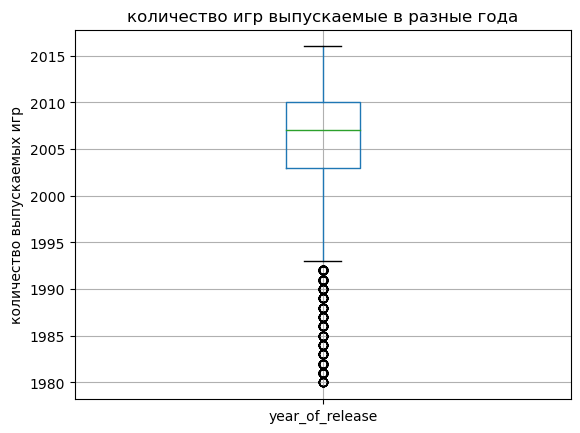

In [81]:
data_clean.boxplot('year_of_release')
plt.title("количество игр выпускаемые в разные года")
plt.ylabel("количество выпускаемых игр")
plt.show()

In [82]:
data_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,-99999,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99999,-99999,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-99999,-99999,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-99999,-99999,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-99999,-99999,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-99999,-99999,no_rating,0.01


In [83]:
data_clean['grup_year_of_release'] = pd.cut(data_clean['year_of_release'], [0, 1993, 2000, 2008, 2016], labels=["до 1993", "до 2000", "до 2008", "до 2017"]) 

In [84]:
data_clean.grup_year_of_release.value_counts()

до 2008    7417
до 2017    6702
до 2000    1959
до 1993     365
Name: grup_year_of_release, dtype: int64

In [85]:
data_clean.grup_year_of_release.value_counts(normalize=True)

до 2008    0.451073
до 2017    0.407590
до 2000    0.119139
до 1993    0.022198
Name: grup_year_of_release, dtype: float64

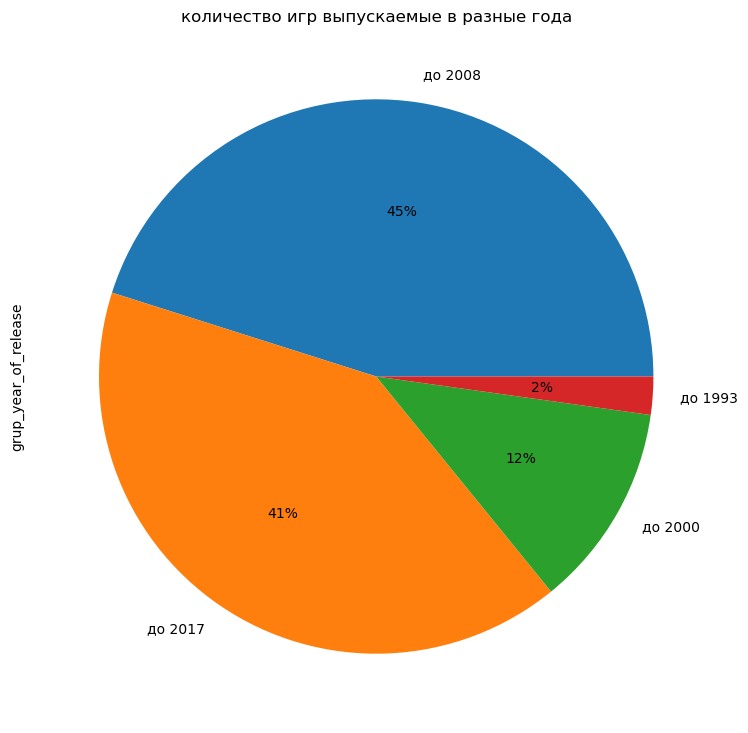

In [86]:
data_clean.grup_year_of_release.value_counts().plot(kind='pie', figsize=(15, 9), autopct='%1.0f%%')
plt.title("количество игр выпускаемые в разные года")
plt.show()

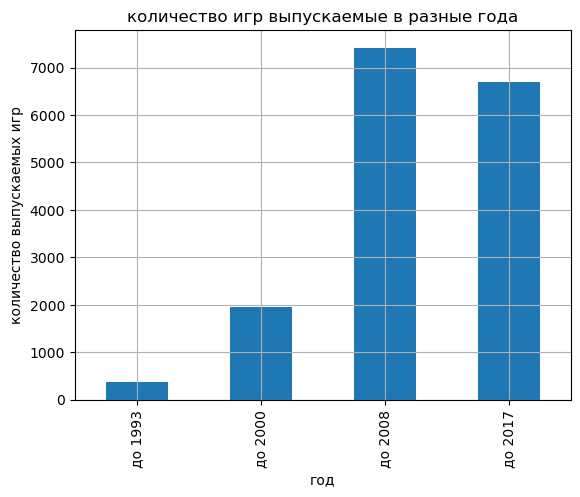

In [87]:
data_clean.groupby('grup_year_of_release')['name'].count().plot(kind='bar', grid=True)
plt.title("количество игр выпускаемые в разные года")
plt.xlabel("год")
plt.ylabel("количество выпускаемых игр")
plt.show()

В наших данных есть записи с 1980 по 2016 год. Больше всего выпущено игр в 2008 год что составляет 8.5%. Меньше всего в 1980м, всего 9 игр что составляет 0.053% Так как до 1993г выпускалось мало игр, моожно считать, что эти данные не актуальны. (выбросы). Количество игр выпущенное с 2000 до 2008 года равно 7417 игр, что составляет 45%, в то время как после 2008 года выпущено 6703 игры, что составляет 40 процентов от всех выпущеных игр.

### Посмотрите, как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [88]:
data_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54,до 2008
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,-99999,no_rating,40.24,до 1993
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52,до 2008
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77,до 2017
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99999,-99999,no_rating,31.38,до 2000


In [89]:
top_platform= data_clean.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(7)['platform']
top_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
Name: platform, dtype: object

In [90]:
data_clean.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(7)['total_sales'].sum()\
/ data_clean['total_sales'].sum()

0.6650295653910212

общая доля проданых игр у топ 7 компаний

In [91]:
data_top_platform = data_clean[data_clean['platform'].isin(top_platform)]

In [92]:
data_top_platform.pivot_table(index='year_of_release',columns='platform', values='name', aggfunc='count' ).tail(5)

platform,DS,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,
2012,23.0,NaN,NaN,147.0,NaN,31.0,106.0
2013,8.0,NaN,NaN,126.0,16.0,12.0,75.0
2014,NaN,NaN,NaN,108.0,75.0,6.0,63.0
2015,NaN,NaN,NaN,73.0,137.0,4.0,35.0
2016,NaN,NaN,NaN,38.0,164.0,1.0,13.0


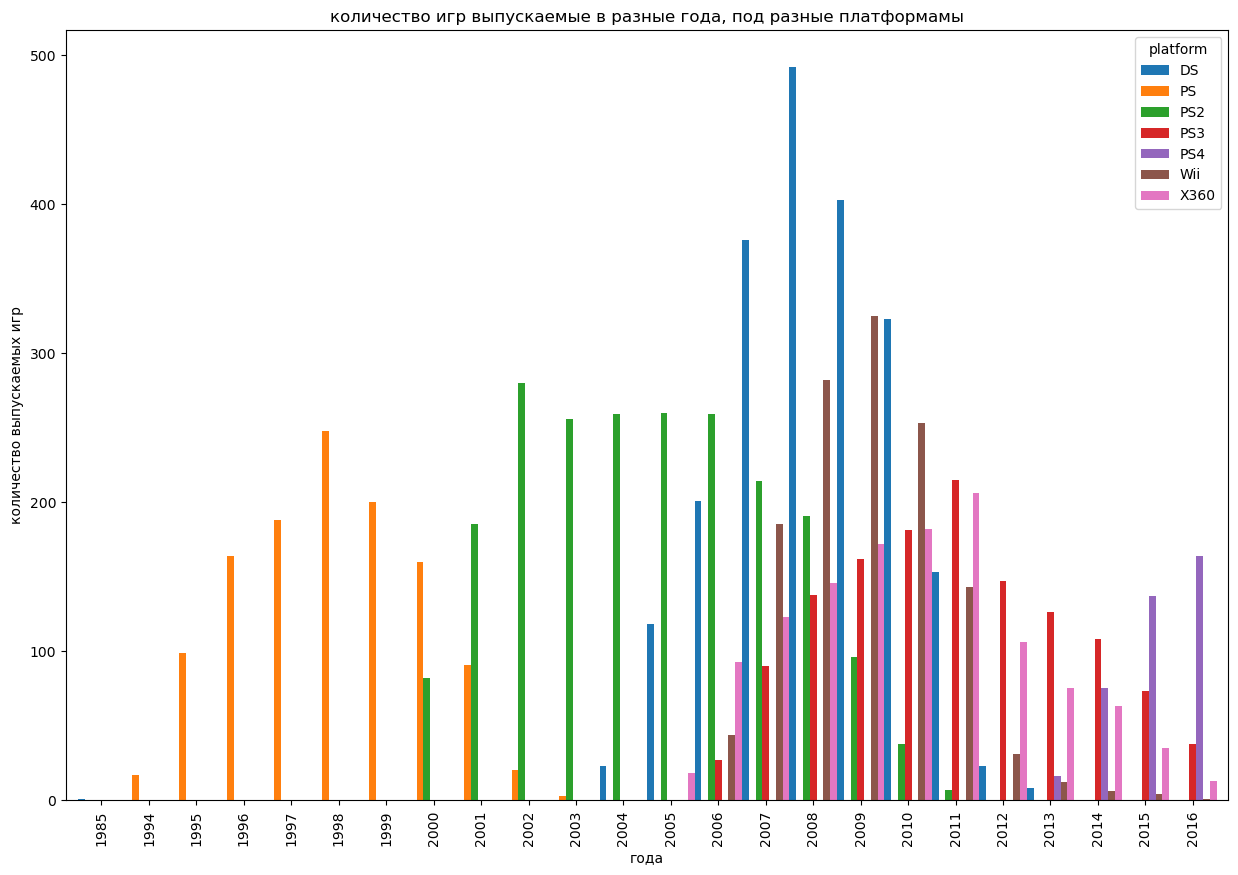

In [93]:
data_top_platform.pivot_table(index='year_of_release',columns='platform', values='name', aggfunc='count' ).\
plot(kind='bar', figsize= (15,10), width=1)
plt.title("количество игр выпускаемые в разные года, под разные платформамы")
plt.xlabel("года")
plt.ylabel("количество выпускаемых игр")
plt.show()

Платформы с наибольшими продажами, топ 7 платформ, занимают 66% всего рынка видеоигр. Актуальный срок жизни платформы составляет 10 - 12 лет.

In [94]:
temp = data_clean.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [95]:
xx = data_top_platform.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
xx['life'] = time_life['max'] - time_life['min'] + 1 
xx['life'].median()

10.0

После проверки выявлено, что у успешных платформ, время жизни больше.

### Возьмите данные за соответствующий актуальный период. 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


In [96]:
actual_data = data_clean[data_clean['year_of_release'] > 2012]

In [97]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05,до 2017
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-99999,-99999,no_rating,14.63,до 2017
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-99999,-99999,no_rating,14.60,до 2017
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62,до 2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-99999,-99999,no_rating,0.01,до 2017
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-99999,-99999,no_rating,0.01,до 2017
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-99999,-99999,no_rating,0.01,до 2017
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-99999,-99999,no_rating,0.01,до 2017


In [98]:
top_actual_platform = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)['platform']
top_actual_platform

0     PS4
1     PS3
2    XOne
3     3DS
4    X360
5    WiiU
6      PC
7     PSV
8     Wii
9     PSP
Name: platform, dtype: object

In [99]:
actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


In [100]:
top_actual_data = actual_data[actual_data['platform'].isin(top_actual_platform)]

считаю актуальным то время в которое выходят игры на современные платформф, так как жижнь платформы примерна равна 10 годам, то и актуальнам будут данные за последние 10 лет. также найдем топ 10 платформ за последние 10 лет. Самой выгодной платформой за актуальное время является PS3 она подала 910.38 милионов копий игр, затем идет X360, с продажами в 901.37 копий, потом Wii 754.03 и DS с продажами в 535.54 милиона копий. PS4 с продажами 314.14, 3DS с продажами 257.81, PSP с продажами 183.31, PS2 с продажами 162.38, PC с продажами	160.57 и замыкает 10ку XOne с продажами	159.32

### Какие платформы лидируют по продажам, растут или падают?
Выберите несколько потенциально прибыльных платформ.


In [101]:
top_actual_data.pivot_table(index='platform', values=['total_sales'], columns='year_of_release', aggfunc='sum')

total_sales                       
year_of_release        2013    2014    2015   2016
platform                                          
3DS                   56.57   43.76   27.78  15.14
PC                    12.38   13.28    8.52   5.25
PS3                  113.25   47.76   16.82   3.60
PS4                   25.99  100.00  118.90  69.25
PSP                    3.14    0.24    0.12    NaN
PSV                   10.59   11.90    6.25   4.25
Wii                    8.59    3.75    1.14   0.18
WiiU                  21.65   22.03   16.35   4.60
X360                  88.58   34.74   11.96   1.52
XOne                  18.96   54.07   60.14  26.15

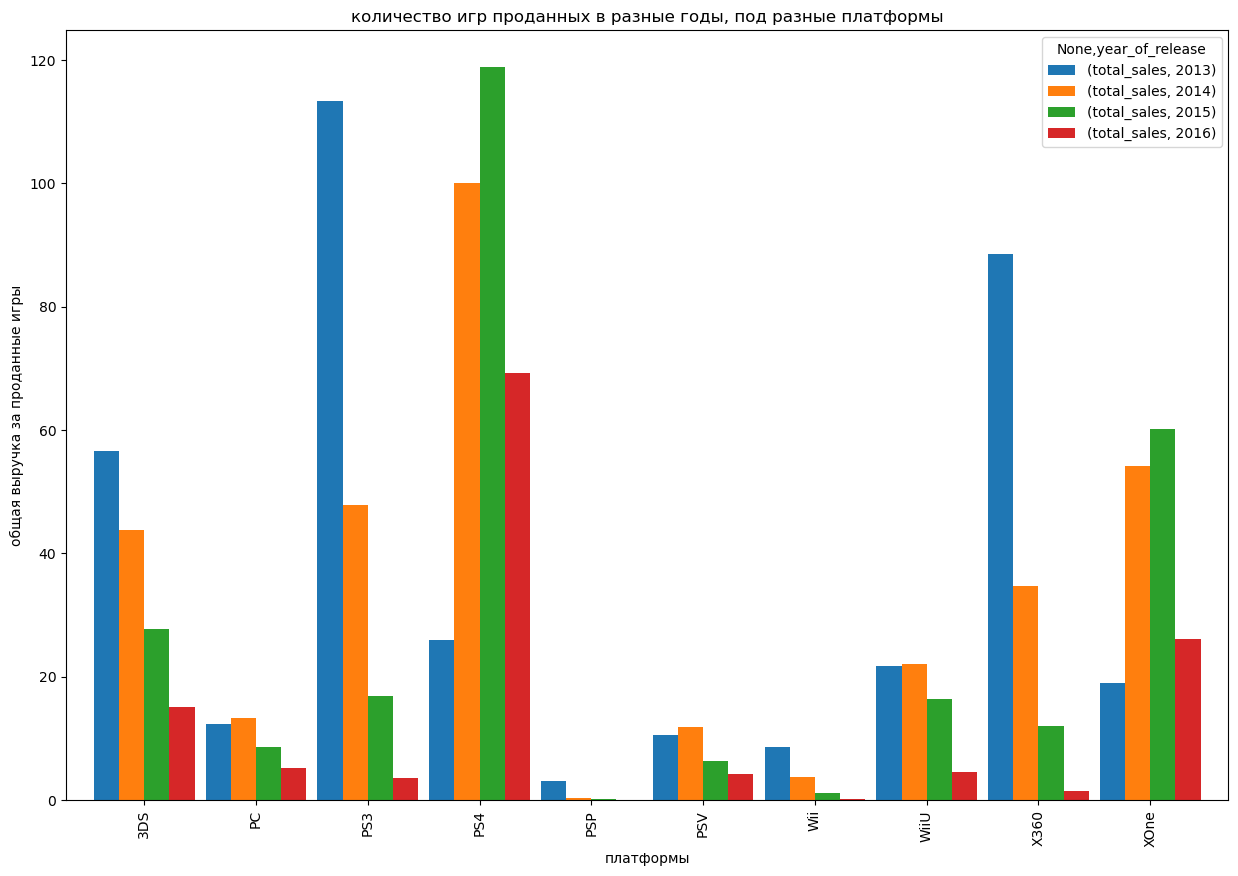

In [102]:
top_actual_data.pivot_table(index='platform', values=['total_sales'], columns='year_of_release', aggfunc='sum').\
plot( kind='bar', figsize= (15,10), width=0.9)
plt.title("количество игр проданных в разные годы, под разные платформы")
plt.xlabel("платформы")
plt.ylabel("общая выручка за проданные игры")
plt.show()

Из десяти платформ, которые за последние 10 лет продами максимальгое количество копий только 2 платформы показывают потенциальный рост: это платформы XOne и PS4. На них стоит обратить особое внимание. четыре платформы в 2016 году вообще не показали прибыли или очень маленькую прибыль: PSP, PSV, PC и Wii про них стоит забыть, их время ушло. И четыре платформы, которые скоро уйдут, но еще могут принести некоторцю прибыль. это 3DS, WiiU, PS3 и X360.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


In [103]:
actual_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05,до 2017
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-99999,-99999,no_rating,14.63,до 2017


In [104]:
platform_data = actual_data.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
platform_data

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2 Summer +,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Zoo Tycoon (2013),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.36
Zumba Fitness: World Party,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,0.24
Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


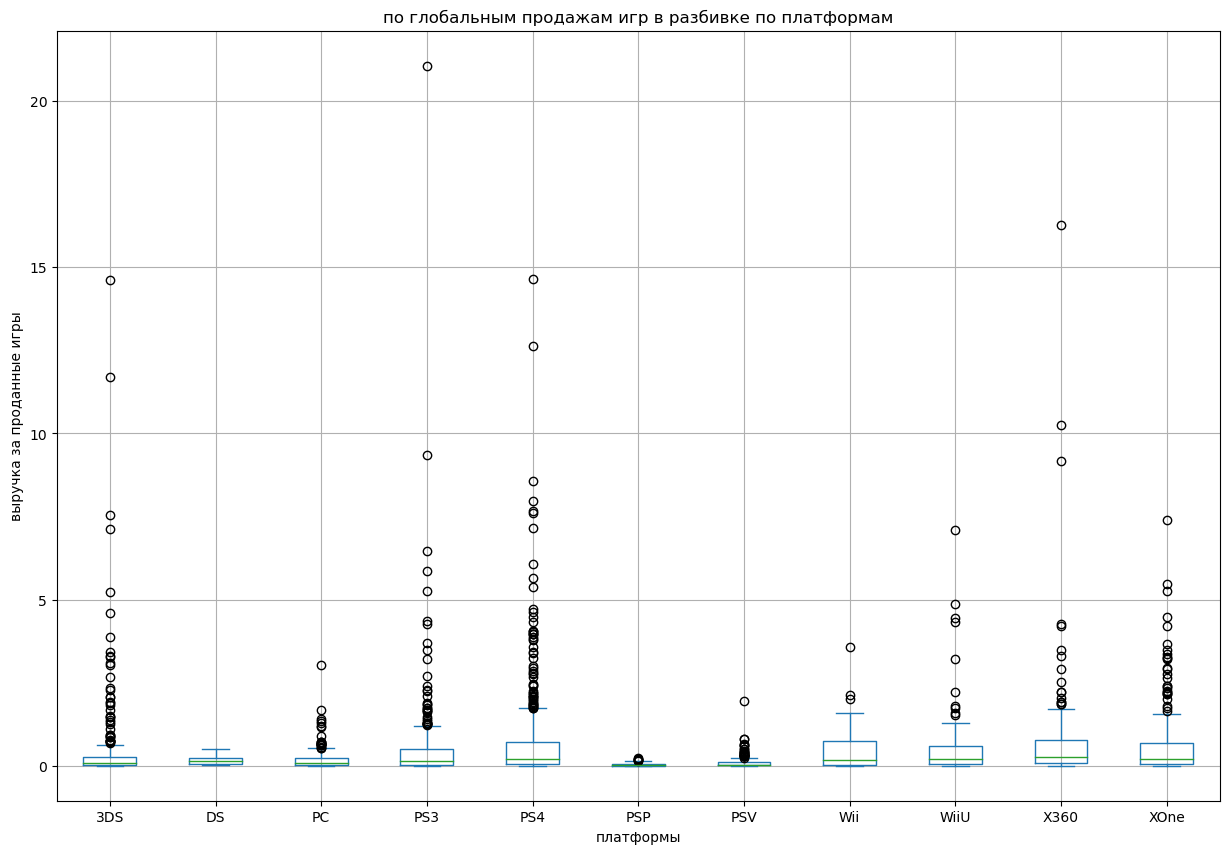

In [105]:
platform_data.plot( kind='box', figsize=(15,10), grid=True)
plt.title("по глобальным продажам игр в разбивке по платформам")
plt.xlabel("платформы")
plt.ylabel("выручка за проданные игры")
plt.show()

Я не понял в чем моя ошибка. сказано:  "Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам."
я в сводной таблице разбиваю актуальные данные по плптформам и вывожу сумму по каждой игре. так как для каждой платформы игра может быть только в одном варианте он выведет сумму 1 игры (добавил внизу группировку, чтобы это было видно.). прошу подробнее обяснить требуемое от меня задание, и у меня был ниже более приближеная диаграмма.

In [106]:
actual_data.groupby(['name','platform'])['name'].count().sort_values()

name                                                        platform
 Beyblade Burst                                             3DS         1
Remember Me                                                 PS3         1
                                                            PC          1
Reine des Fleurs                                            PSV         1
Refrain no Chika Meikyuu to Majo no Ryodan                  PSV         1
                                                                       ..
Grand Kingdom                                               PS4         1
                                                            PSV         1
Grand Theft Auto V                                          PC          1
Gotouchi Tetsudou: Gotouchi Chara to Nihon Zenkoku no Tabi  WiiU        1
inFAMOUS: Second Son                                        PS4         1
Name: name, Length: 2233, dtype: int64

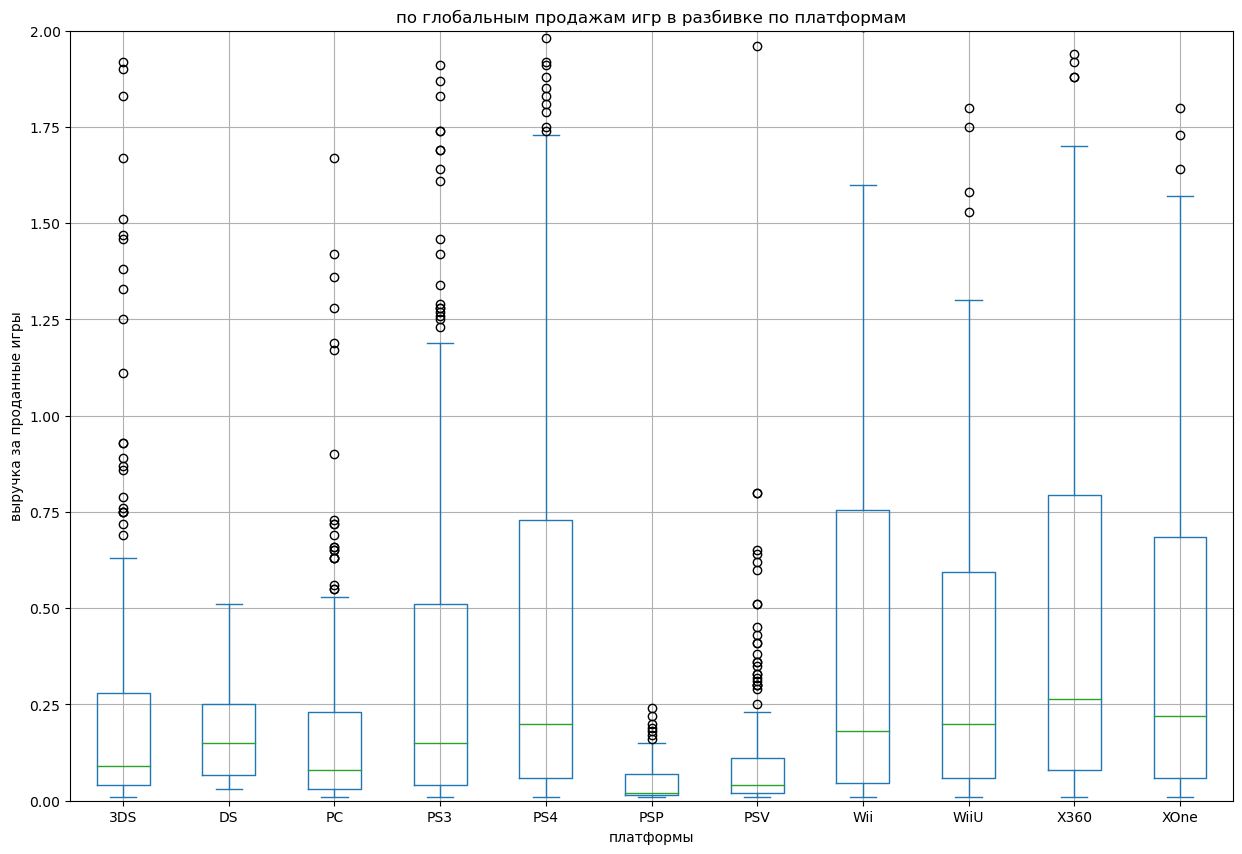

In [107]:
platform_data.plot(ylim=(0, 2), kind='box', figsize=(15,10), grid=True)
plt.title("по глобальным продажам игр в разбивке по платформам")
plt.xlabel("платформы")
plt.ylabel("выручка за проданные игры")
plt.show()

In [108]:
actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


In [109]:
platform_data.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,303.000000,8.000000,189.000000,345.000000,392.000000,67.000000,358.000000,23.000000,115.000000,186.000000,247.000000
mean,0.472772,0.192500,0.208624,0.525884,0.801378,0.052239,0.092151,0.593913,0.562000,0.735484,0.645020
std,1.381347,0.172026,0.352304,1.451939,1.609456,0.059768,0.153816,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


график "ящик с усами" не показывают картину в целом для платформ по глобальным продажам. И в первую очередь это связано с тем, что "ящик с усами" считает многие проданые игры выбросами, в то время как эти игры принесли платформе основной доход, Максимальная медиана проданых копий принадлежит платформе X360 и составляет 0.265 милиона копий, а доход учитывается со 186 игрр по которым есть данные, в то время как лидер продаж платворма PS4 имеет медиану проданых копий равную 0.2 милоинам и включает данные по 392 проданым играм. Но также мы можем увидеть, что чем жирнее хвостда графике с усами, тем больше продаж у этой платформы.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Будем проводить анализ платформы X360. так как популярная платформа входит в топ 10 и уже прошло ее время.

In [110]:
X360_data = actual_data[actual_data['platform'] == 'X360']
X360_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,26,M,10.24,до 2017
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-99999,-99999,no_rating,9.18,до 2017


#### отзывы критиков critic_score

In [111]:
critic_X360_data = X360_data[X360_data['critic_score'] > 0]
critic_X360_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,26,M,10.24,до 2017
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,81,49,M,4.28,до 2017


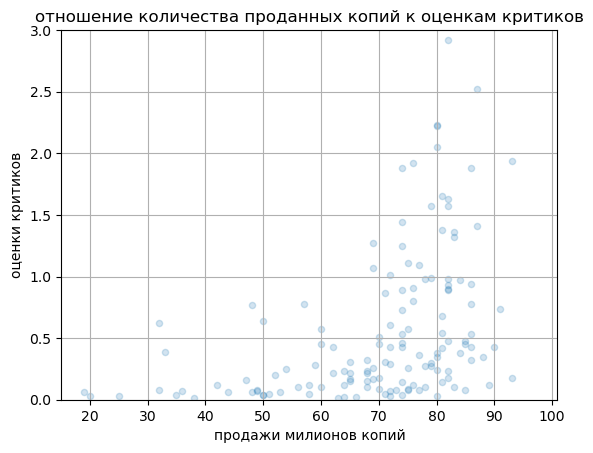

In [112]:
critic_X360_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2, grid=True, ylim=(0, 3))
plt.title("отношение количества проданных копий к оценкам критиков")
plt.xlabel("продажи милионов копий")
plt.ylabel("оценки критиков")
plt.show()

In [113]:
critic_X360_data.critic_score.corr(critic_X360_data.total_sales)

0.29699834561442984

In [114]:
critic_X360_data.critic_score.corr(critic_X360_data.na_sales)

0.28948737692545645

In [115]:
critic_X360_data.critic_score.corr(critic_X360_data.eu_sales)

0.27989182329949974

In [116]:
critic_X360_data.critic_score.corr(critic_X360_data.jp_sales)

0.20258999581386197

In [117]:
critic_X360_data.critic_score.corr(critic_X360_data.other_sales)

0.2983098124893058

Есть зависимость между оценками критиков и общим количеством проданных копий игры. кореляция составляет 0,29.
если смотреть корреляцию по регионам, то самоя маленькая кореляция в регионе Японии, самая большая в сставшихся регионах(то есть не в северной Америке и не в Европе)

#### отзывы пользователей user_score

In [118]:
user_X360_data = X360_data[X360_data['user_score'] > 0]
user_X360_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,26,M,10.24,до 2017
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,81,49,M,4.28,до 2017


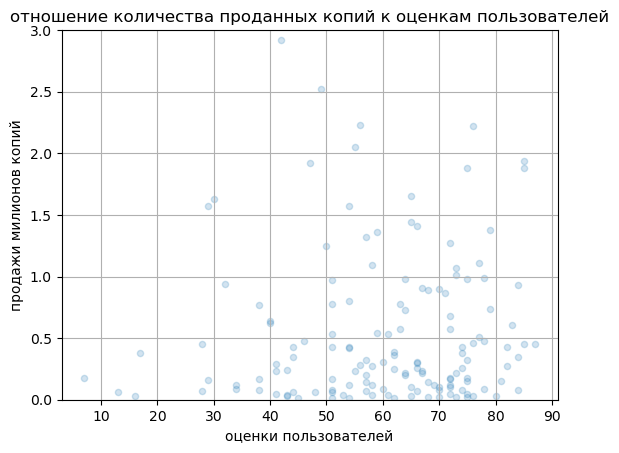

In [119]:
user_X360_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2, grid=True, ylim=(0,3))
plt.title("отношение количества проданных копий к оценкам пользователей")
plt.ylabel("продажи милионов копий")
plt.xlabel("оценки пользователей")
plt.show()

In [120]:
user_X360_data.user_score.corr(user_X360_data.total_sales)

0.002650487819493616

In [121]:
user_X360_data.user_score.corr(user_X360_data.na_sales)

-0.0005481981461174617

In [122]:
user_X360_data.user_score.corr(user_X360_data.eu_sales)

0.007965696048716848

In [123]:
user_X360_data.user_score.corr(user_X360_data.jp_sales)

0.1306406168283349

In [124]:
user_X360_data.user_score.corr(user_X360_data.other_sales)

-0.0033997436841110055

Зависимости между количеством проданных игр и оценками пользователей нет, в отличие от зависимости с оценками критиков. И составляет 0.0026. Самая большая корреляция, 0.13 в регионе Японии, в остальных регионах корреляция отсутствует.

### Соотнесите выводы с продажами игр на других платформах.


In [125]:
PC_data = actual_data[actual_data['platform'] == 'PC']
PC_data_critic = PC_data[PC_data['critic_score'] > 0]
PC_data_user = PC_data[PC_data['user_score'] > 0]

In [126]:

print(len(actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]))
print(len(actual_data[(actual_data['platform'] == 'PC') & (actual_data['critic_score'] > 0)]))
print(len(PC_data))

157
153
189


In [127]:
PC_data_critic.critic_score.corr(PC_data_critic.total_sales)

0.19547213915137965

In [128]:
PC_data_user.user_score.corr(PC_data_user.total_sales)

-0.10652228303150134

In [129]:
actual_rating_critic_data = actual_data[actual_data['critic_score'] > 0]
actual_rating_user_data = actual_data[actual_data['user_score'] > 0]

In [130]:
actual_rating_critic_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05,до 2017
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62,до 2017


In [131]:
actual_rating_user_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05,до 2017
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62,до 2017


Так спешил в надежде, что смогу продолжить обучение без перерыва, что не проверил работоспособность кода, сейчас проверил все рнаботает, также подправил графики вначале работы.

In [132]:
sampl_top_actual_platform = top_actual_platform.sample(10)

In [133]:
sampl_top_actual_platform

4    X360
0     PS4
6      PC
2    XOne
8     Wii
3     3DS
5    WiiU
1     PS3
7     PSV
9     PSP
Name: platform, dtype: object

у платформы X360 корреляция равнв 0.29699834561442984
количество игр проданых платформой X360 за актуальгое время равно 145
у платформы PS4 корреляция равнв 0.3916437135868497
количество игр проданых платформой PS4 за актуальгое время равно 285
у платформы PC корреляция равнв 0.19547213915137965
количество игр проданых платформой PC за актуальгое время равно 153
у платформы XOne корреляция равнв 0.37413803611747093
количество игр проданых платформой XOne за актуальгое время равно 202
у платформы Wii корреляция равнв 0.43230739338573965
количество игр проданых платформой Wii за актуальгое время равно 17
у платформы 3DS корреляция равнв 0.3437458178377859
количество игр проданых платформой 3DS за актуальгое время равно 97
у платформы WiiU корреляция равнв 0.3802387915825
количество игр проданых платформой WiiU за актуальгое время равно 84
у платформы PS3 корреляция равнв 0.297004526101671
количество игр проданых платформой PS3 за актуальгое время равно 212
у платформы PSV корреляция равн

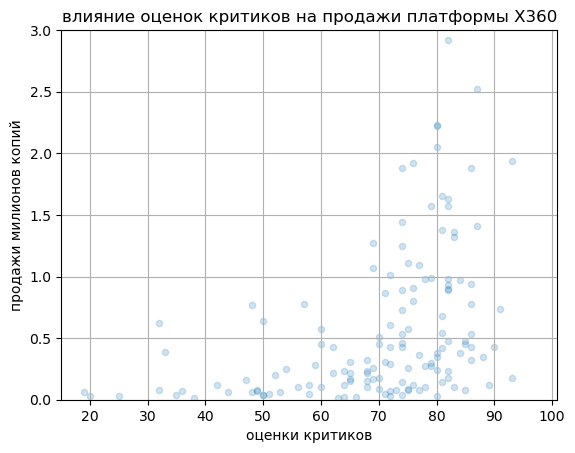

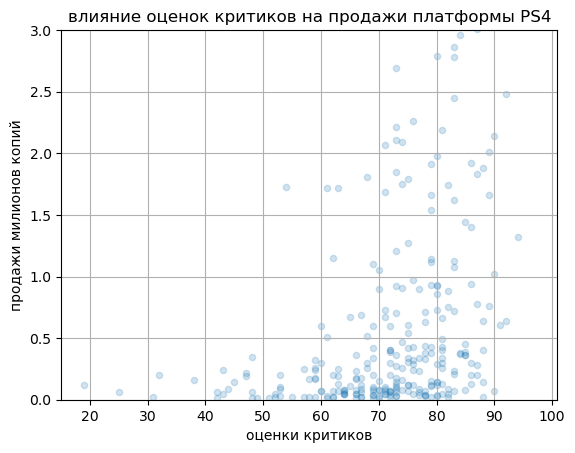

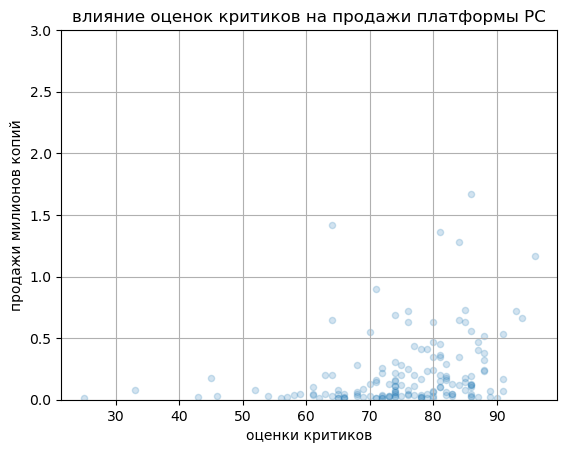

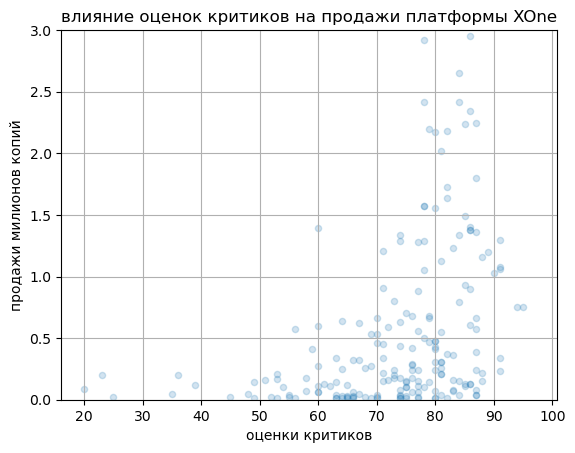

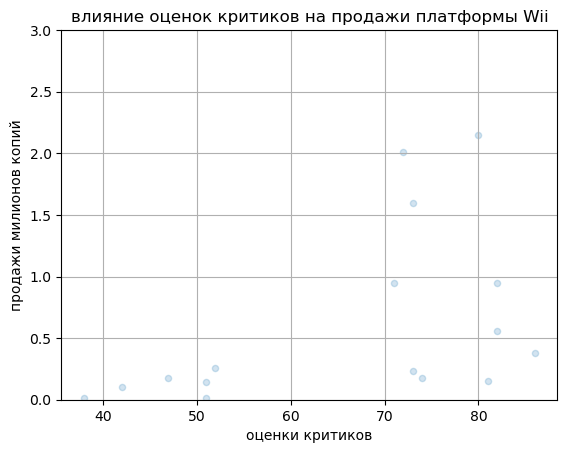

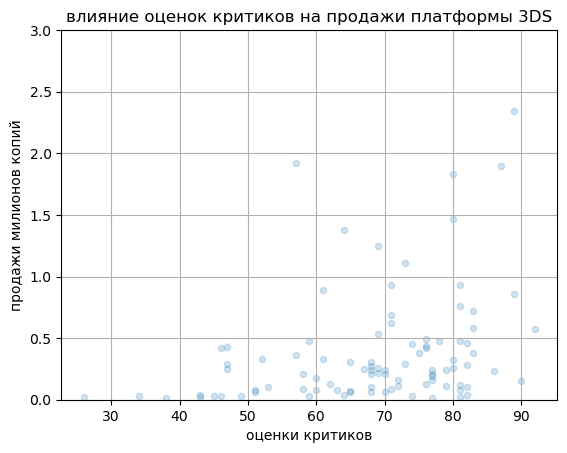

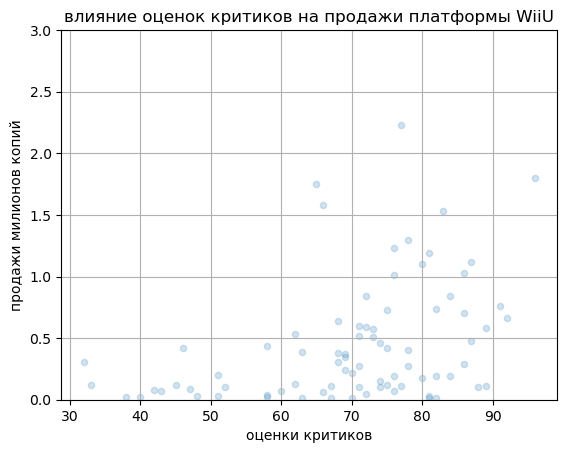

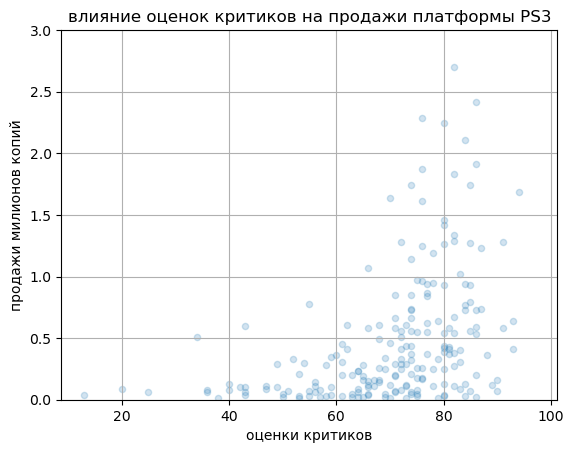

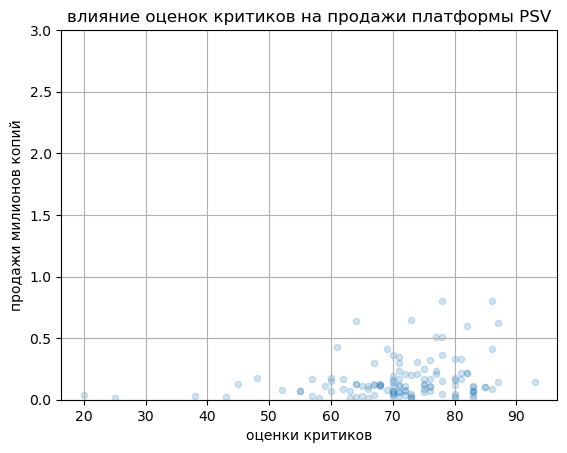

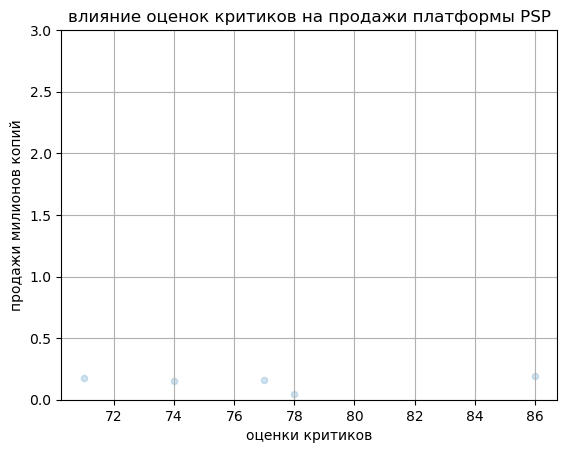

In [134]:
for i in sampl_top_actual_platform:
    actual_rating_critic_data[actual_rating_critic_data['platform'] == i].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2, grid=True, ylim=(0,3))
    plt.title(f'влияние оценок критиков на продажи платформы {i}')
    plt.ylabel("продажи милионов копий")
    plt.xlabel("оценки критиков")
    print('у платформы', i, 'корреляция равнв',actual_rating_critic_data[actual_rating_critic_data['platform'] == i].critic_score.corr(actual_rating_critic_data[actual_rating_critic_data['platform'] == i].total_sales))
    print(f'количество игр проданых платформой {i} за актуальгое время равно {len(actual_rating_critic_data[actual_rating_critic_data["platform"] == i])}')

у платформы X360 корреляция равнв 0.002650487819493616
количество игр проданых платформой X360 за актуальгое время равно 149
у платформы PS4 корреляция равнв -0.015104698453309223
количество игр проданых платформой PS4 за актуальгое время равно 289
у платформы PC корреляция равнв -0.10652228303150134
количество игр проданых платформой PC за актуальгое время равно 157
у платформы XOne корреляция равнв -0.08540899707599267
количество игр проданых платформой XOne за актуальгое время равно 199
у платформы Wii корреляция равнв 0.5857950969691171
количество игр проданых платформой Wii за актуальгое время равно 9
у платформы 3DS корреляция равнв 0.2522446667267343
количество игр проданых платформой 3DS за актуальгое время равно 91
у платформы WiiU корреляция равнв 0.415402116006549
количество игр проданых платформой WiiU за актуальгое время равно 84
у платформы PS3 корреляция равнв 0.007391471352413784
количество игр проданых платформой PS3 за актуальгое время равно 199
у платформы PSV коррел

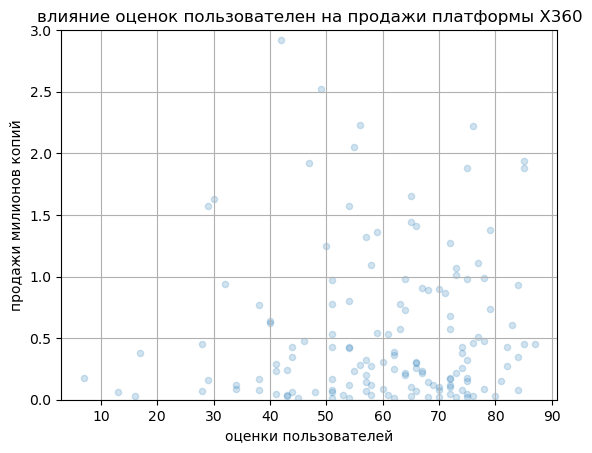

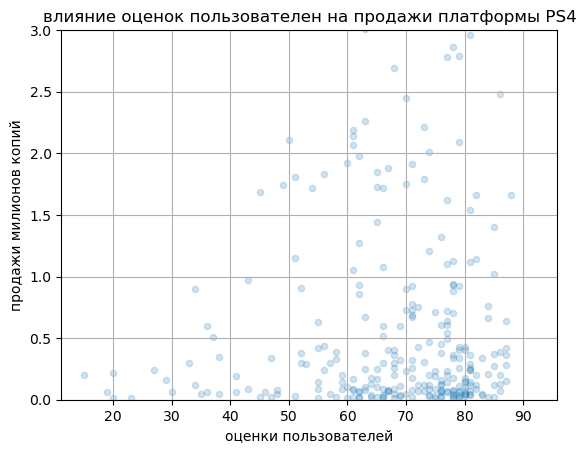

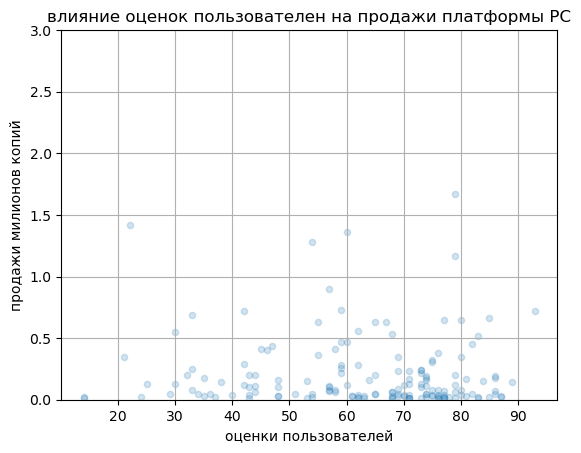

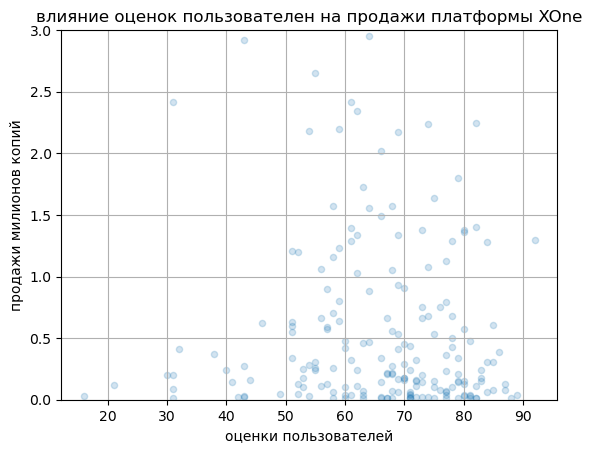

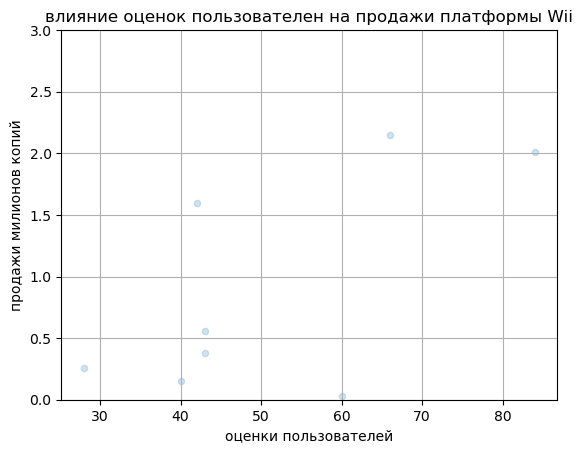

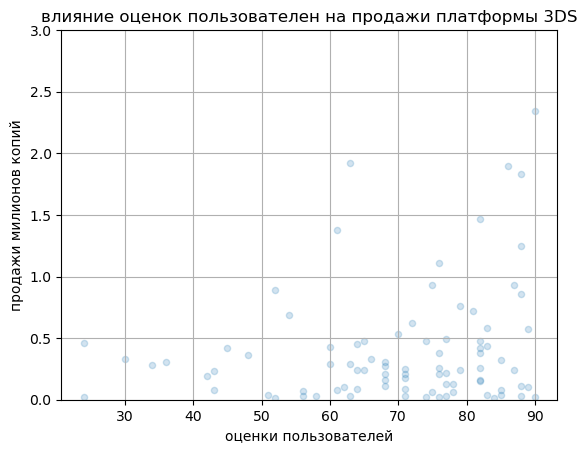

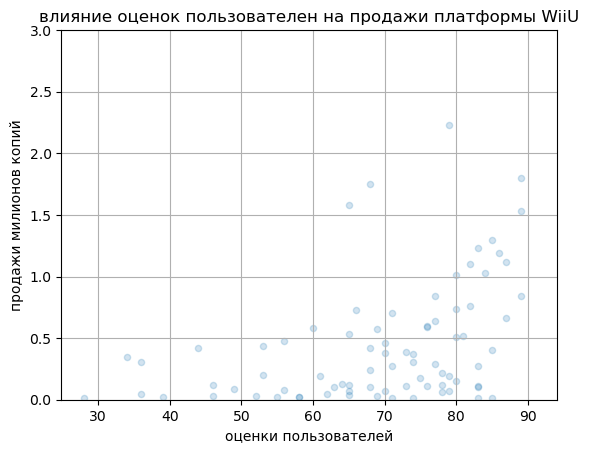

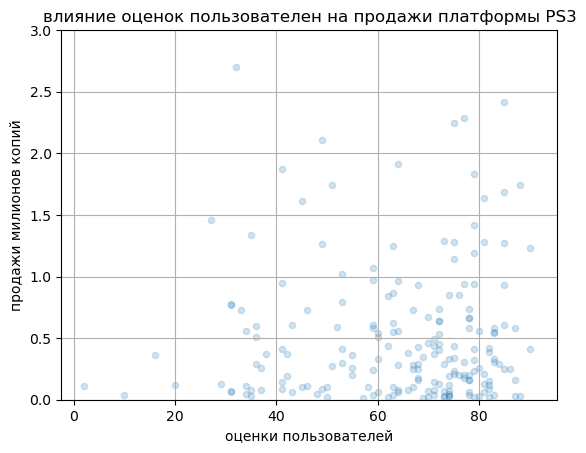

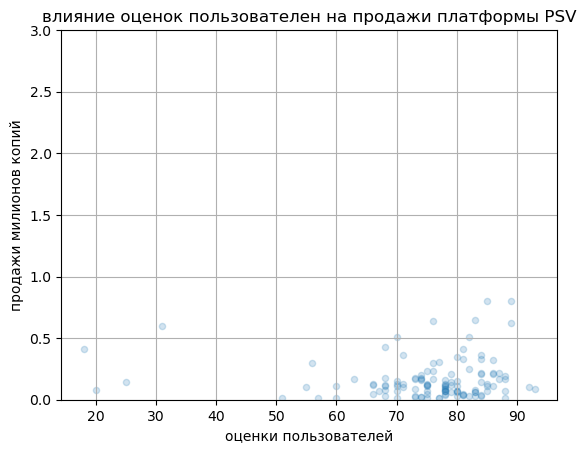

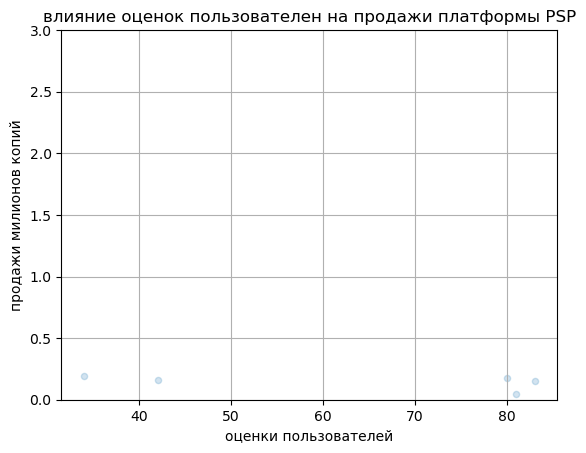

In [135]:
for i in sampl_top_actual_platform:
    actual_rating_user_data[actual_rating_user_data['platform'] == i].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2, grid=True, ylim=(0,3))
    plt.title(f'влияние оценок пользователен на продажи платформы {i}')
    plt.ylabel("продажи милионов копий")
    plt.xlabel("оценки пользователей")
    print('у платформы', i, 'корреляция равнв',actual_rating_user_data[actual_rating_user_data['platform'] == i].user_score.corr(actual_rating_user_data[actual_rating_user_data['platform'] == i].total_sales))
    print(f'количество игр проданых платформой {i} за актуальгое время равно {len(actual_rating_user_data[actual_rating_user_data["platform"] == i])}')

закономерносте между рейтингом игры у пользователей и количеством продаж не выявлено. У некоторых платформ небольшая положительная корреляция, у некоторых небольшая отрицательная корреляция, но чаще всего корреляции не просматривается. 

### Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

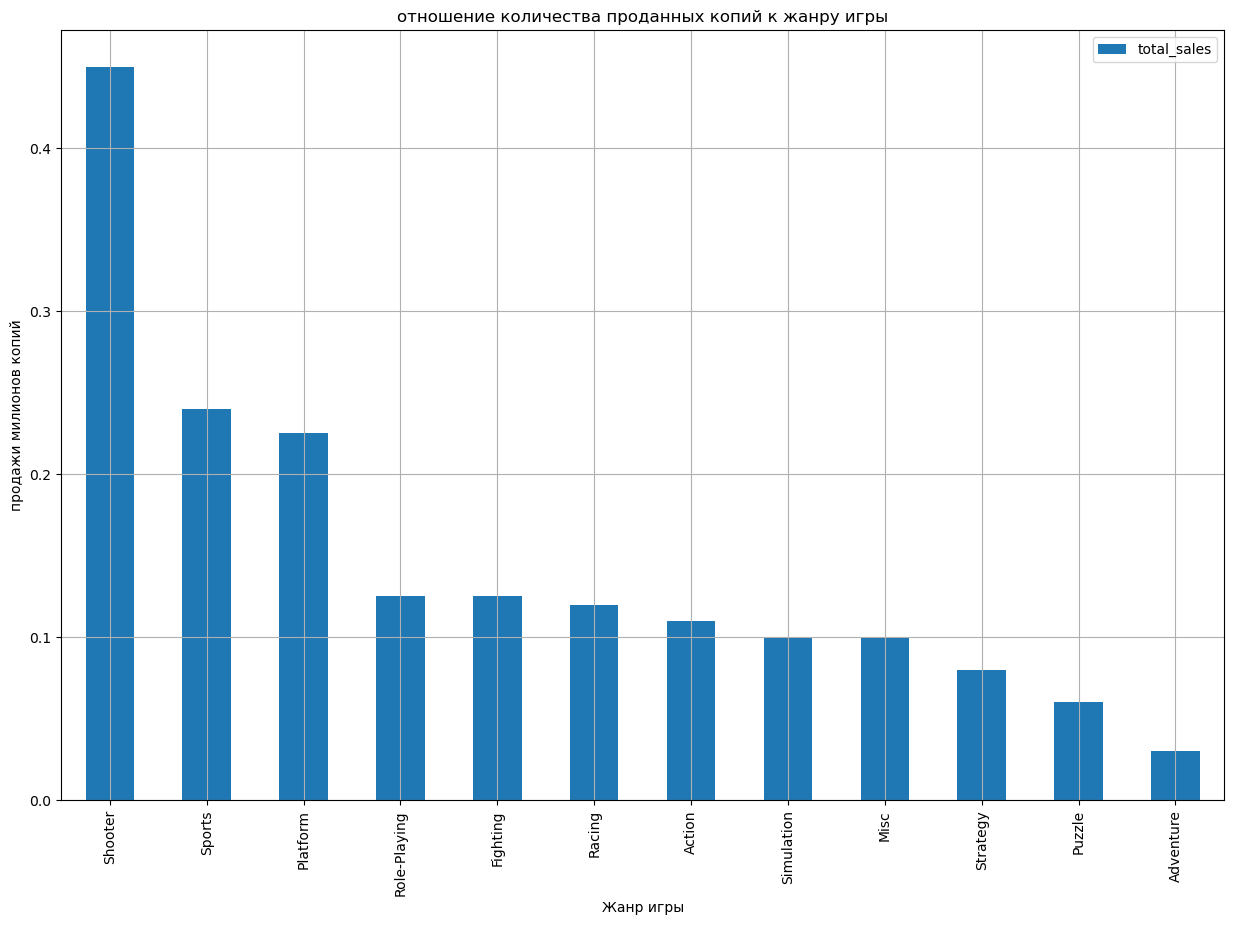

In [136]:
actual_data.pivot_table(index='genre',  values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).\
plot(kind='bar', grid=True, figsize=(15, 10) )
plt.title("отношение количества проданных копий к жанру игры")
plt.xlabel("Жанр игры")
plt.ylabel("продажи милионов копий")
plt.show()

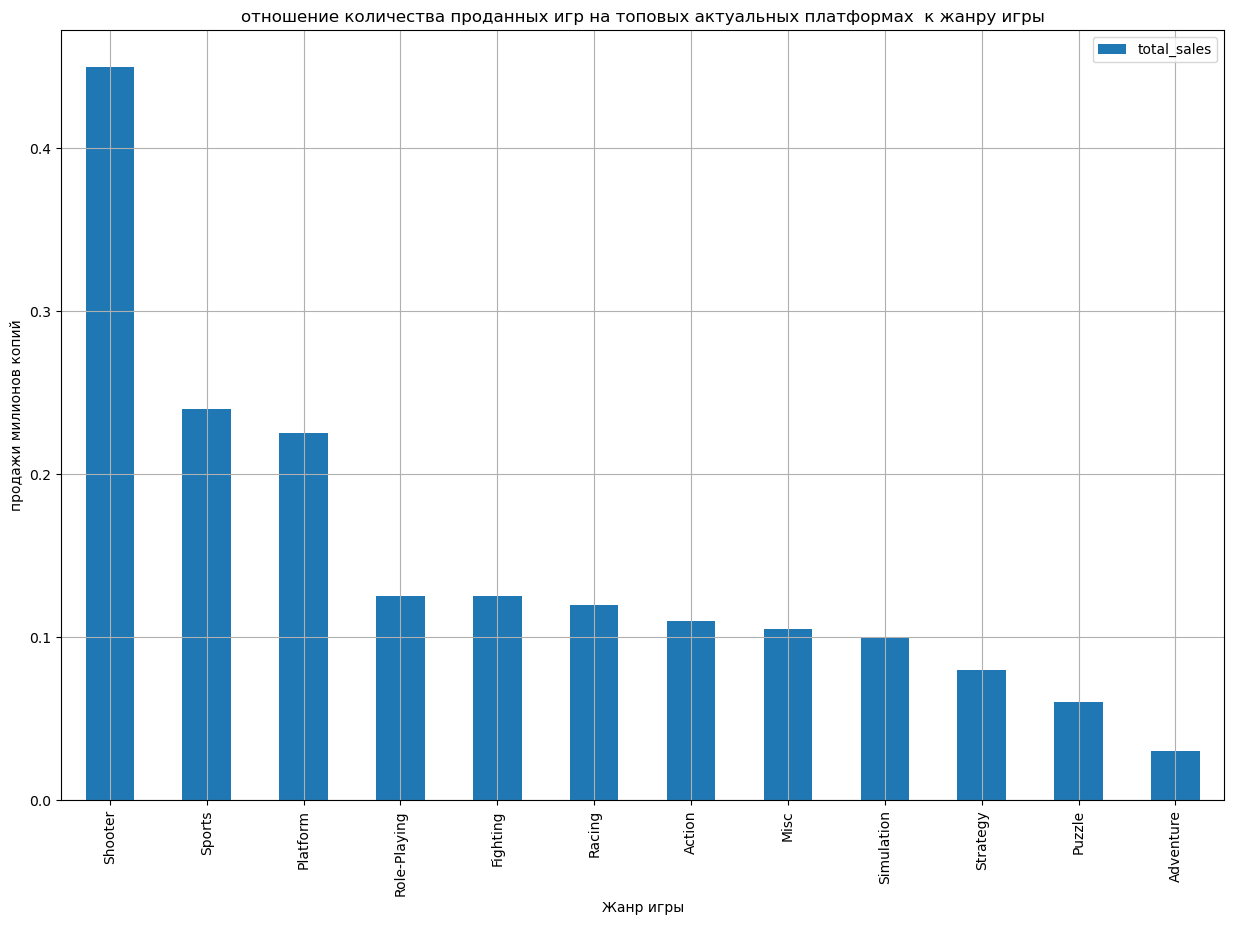

In [137]:
top_actual_data.pivot_table(index='genre',  values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).\
plot(kind='bar', grid=True, figsize=(15, 10) )
plt.title("отношение количества проданных игр на топовых актуальных платформах  к жанру игры")
plt.xlabel("Жанр игры")
plt.ylabel("продажи милионов копий")
plt.show()

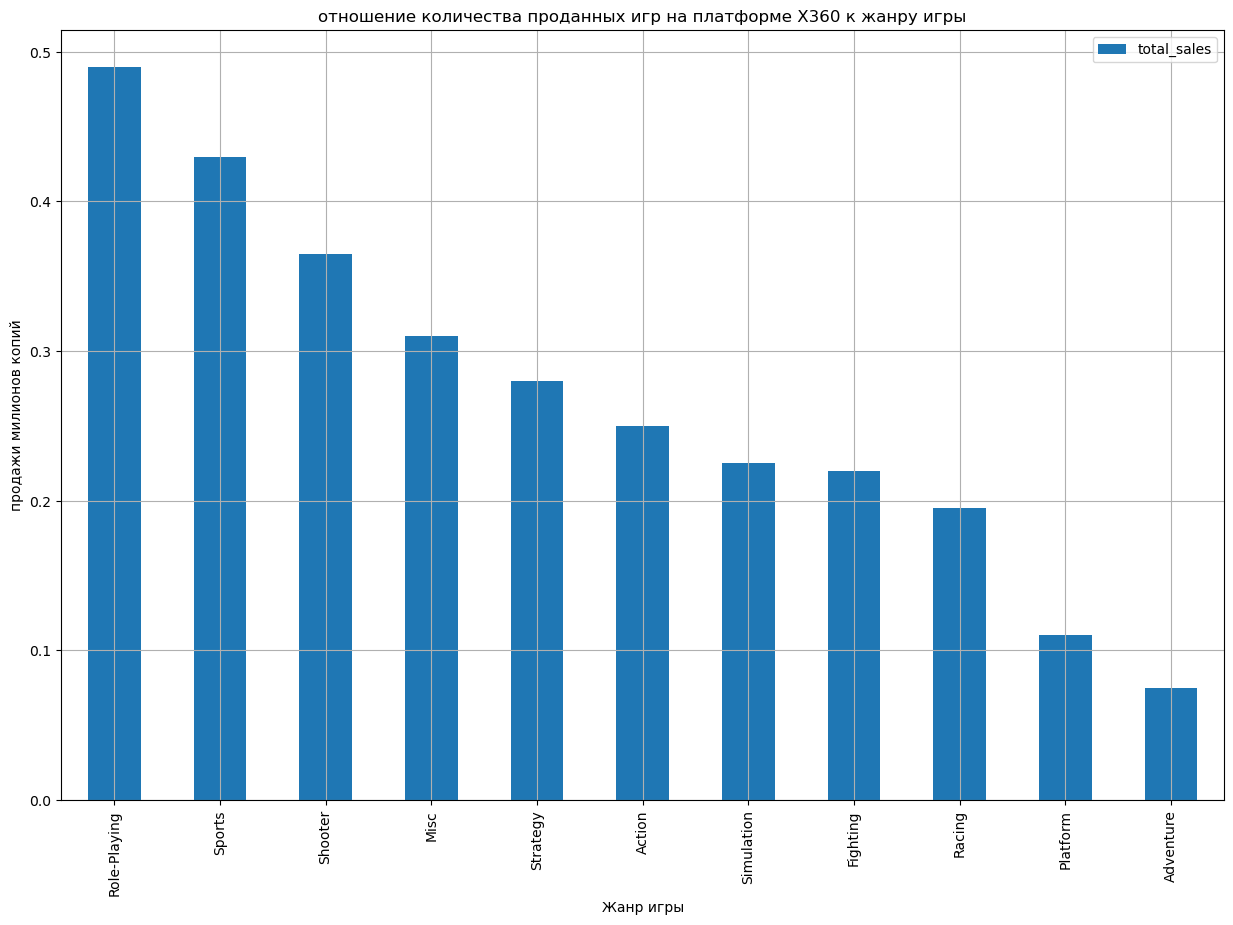

In [138]:
X360_data.pivot_table(index='genre',  values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).\
plot(kind='bar', grid=True, figsize=(15, 10) )
plt.title("отношение количества проданных игр на платформе X360 к жанру игры")
plt.xlabel("Жанр игры")
plt.ylabel("продажи милионов копий")
plt.show()

In [139]:
X360_data.pivot_table(index='genre',  values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Role-Playing,0.490
Sports,0.430
Shooter,0.365
Misc,0.310
Strategy,0.280
Action,0.250
Simulation,0.225
Fighting,0.220
Racing,0.195


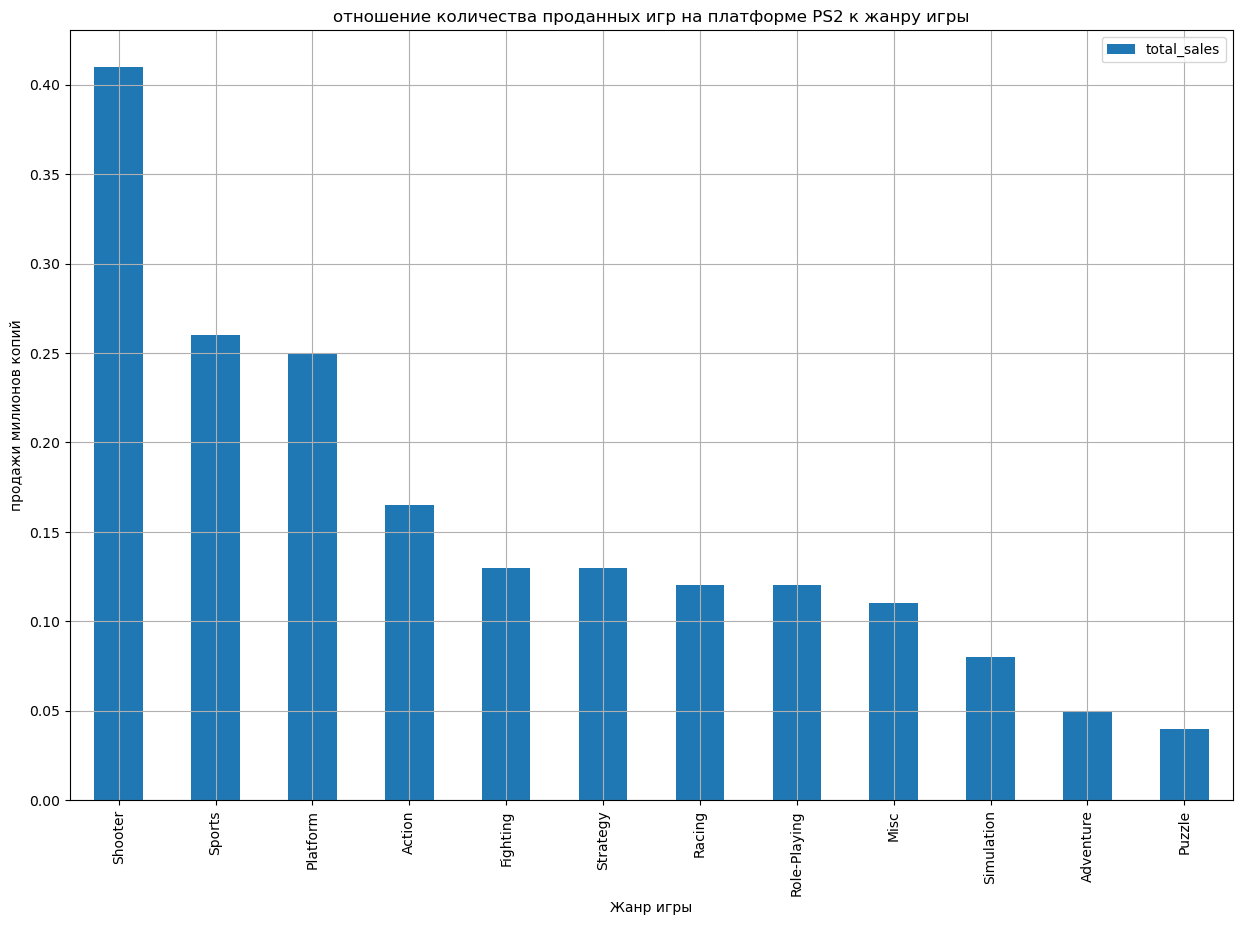

In [140]:
PS3_oll_data = actual_data[actual_data['platform'] == 'PS3']
PS3_oll_data.pivot_table(index='genre',  values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).\
plot(kind='bar', grid=True, figsize=(15, 10) )
plt.title("отношение количества проданных игр на платформе PS2 к жанру игры")
plt.xlabel("Жанр игры")
plt.ylabel("продажи милионов копий")
plt.show()

In [141]:
PS3_oll_data.pivot_table(index='genre',  values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.410
Sports,0.260
Platform,0.250
Action,0.165
Fighting,0.130
Strategy,0.130
Racing,0.120
Role-Playing,0.120
Misc,0.110


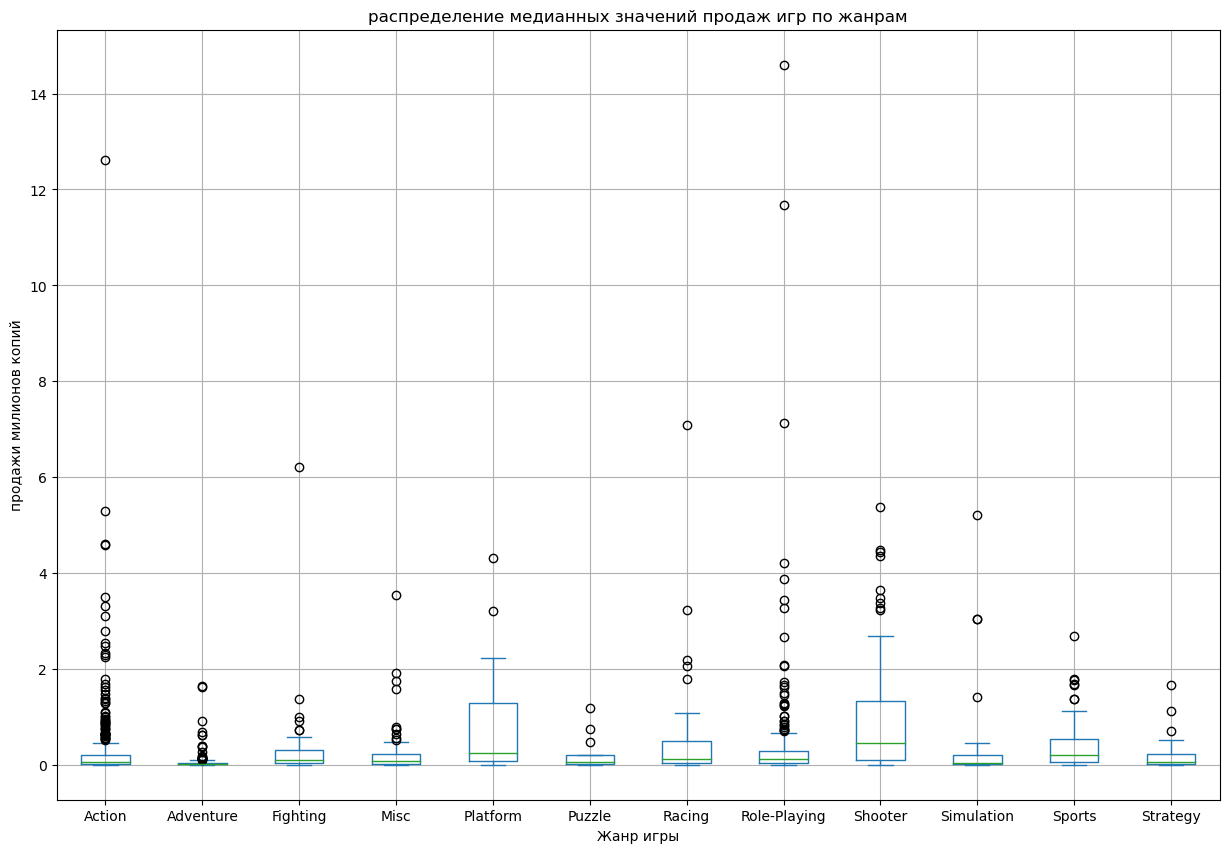

In [142]:
actual_data.pivot_table(columns='genre', index='name' , values='total_sales', aggfunc='median').plot(kind='box', grid=True, figsize=(15, 10) )
plt.title("распределение медианных значений продаж игр по жанрам")
plt.xlabel("Жанр игры")
plt.ylabel("продажи милионов копий")
plt.show()

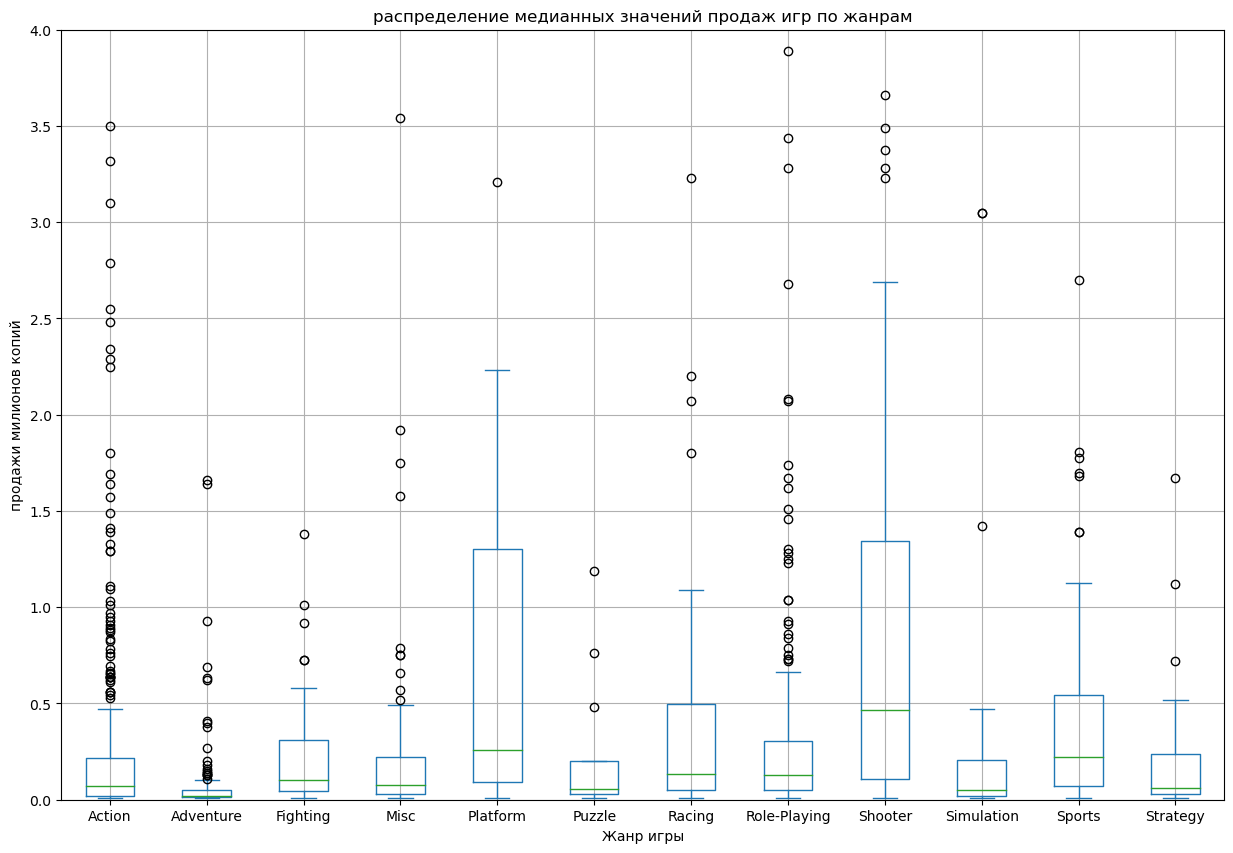

In [143]:
actual_data.pivot_table(columns='genre', index='name' , values='total_sales', aggfunc='median').plot(kind='box', grid=True, figsize=(15, 10), ylim=(0, 4) )
plt.title("распределение медианных значений продаж игр по жанрам")
plt.xlabel("Жанр игры")
plt.ylabel("продажи милионов копий")
plt.show()

In [144]:
actual_data.pivot_table(index='genre',  values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


При анализе игр по жанрам модно сказать, что наибольшее медианное значение продаж на всех платформах у игр жанра Shooter и оно равно 0.450 (с большим отрывом), затем идет Sports с 0.240 и Platform с 0.225 неньше всего медиана у Strategy с 0.080, Puzzle и Adventure. Также видно, что у разных платформ рейтинг медианных продаж разный. например у PS3 он практически не отличается от данных по всем платформам и составляют Shooter	0.410, Sports 0.260 и Platform	0.25, а у X360 медианные значения топ 3 продаж составляют Role-Playing 0.490 и Sports 0.430 больше чем у Shooter 0.365

В зависимости от платформы или времени лидер в категории жанры может поменятся, но в топ 3 жанра всегда выбиваются жанры Action, Sports и Shooter. а в аутсайдерах остаются Strategy, Adventure и Puzzle. Жанры Racing, Misc, Role-Playing, чаще всего занимают с 4 по 6е места по популярности. А жанры Fighting, Platform, Simulation занимают места с 7го по 9е места.

In [145]:
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

## Шаг 4. Составьте портрет пользователя каждого региона


### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). 
Опишите различия в долях продаж.

In [146]:
top_5_na_data = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_na_data

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

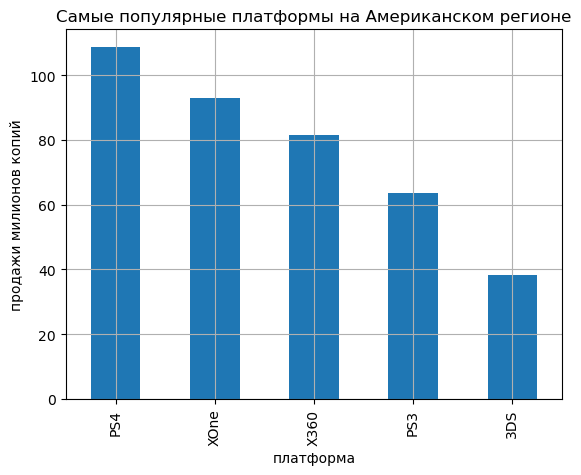

In [147]:
top_5_na_data.plot(kind='bar', grid=True)
plt.title("Самые популярные платформы на Американском регионе")
plt.xlabel("платформа")
plt.ylabel("продажи милионов копий")
plt.show()

In [148]:
top_5_eu_data = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_eu_data

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

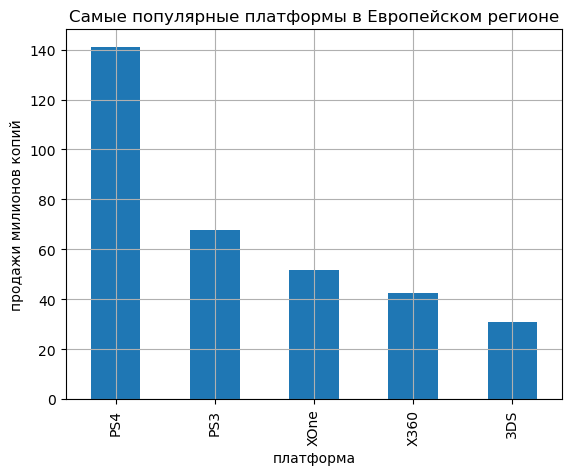

In [149]:
top_5_eu_data.plot(kind='bar', grid=True)
plt.title("Самые популярные платформы в Европейском регионе")
plt.xlabel("платформа")
plt.ylabel("продажи милионов копий")
plt.show()

In [150]:
top_5_jp_data = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_5_jp_data

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

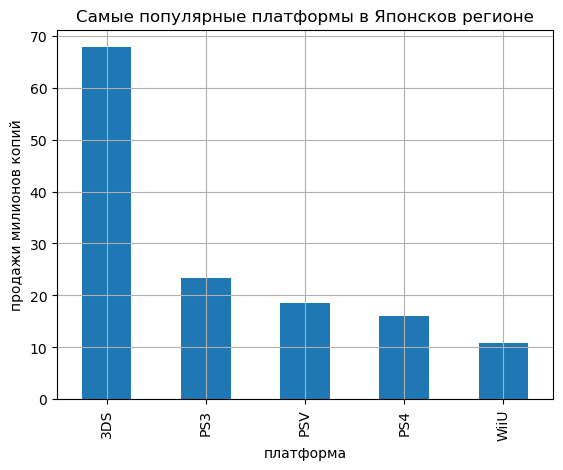

In [151]:
top_5_jp_data.plot(kind='bar', grid=True)
plt.title("Самые популярные платформы в Японсков регионе")
plt.xlabel("платформа")
plt.ylabel("продажи милионов копий")
plt.show()

Если смотреть на данные за актуальное время то можно увидеть, что в америке самая популярная платформа PS4 108.74, затем
XOne 93.12, X360 81.66,PS3 63.50 и замыкает 5ку 3DS 38.20  в Европе самая популярная платформа с большим отрывом PS4 141.09, затем идут PS3 67.81, XOne 51.59, X360 42.52 и замыкает 5ку 3DS 30.96. В свою очередь, в Японии самая популярная платформа 3DS    67.81, PS3 23.35, PSV 18.59, PS4 15.96, WiiU 10.88. 

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). 
Поясните разницу.

In [152]:
actual_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05,до 2017
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-99999,-99999,no_rating,14.63,до 2017


статистика жанров Американского региона 
 genre
Action          126.05
Shooter         109.74
Sports           65.27
другой           62.76
Role-Playing     46.40
Misc             27.49
Name: Американского, dtype: float64
------------------------------
статистика жанров Еевропейского региона 
 genre
Action          118.13
Shooter          87.86
другой           68.56
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: Еевропейского, dtype: float64
------------------------------
статистика жанров Японского региона 
 genre
Role-Playing    51.04
Action          40.49
другой          25.79
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: Японского, dtype: float64
------------------------------


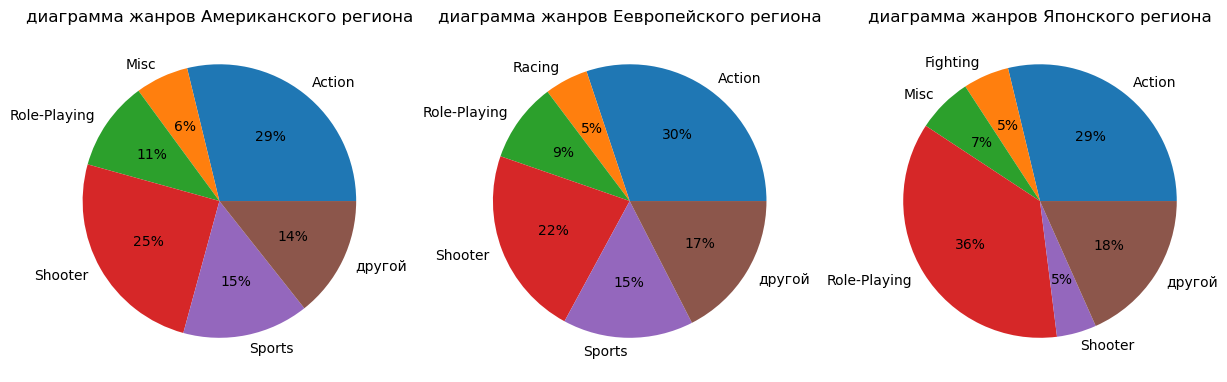

In [153]:
region_data = actual_data
region_data = region_data.rename(columns={'na_sales':'Американского','eu_sales':'Еевропейского','jp_sales':'Японского'})
region_data
region =['Американского','Еевропейского','Японского']

plt.figure(figsize=[15, 15])
namber = 1
for i in region:
    x_data = region_data.copy()    
    x_top = region_data.groupby('genre')[i].sum().sort_values(ascending=False).reset_index().genre.head(5)
    
    x_data.loc[~x_data['genre'].isin(x_top), 'genre'] = 'другой'
    print(f"статистика жанров {i} региона \n {x_data.groupby('genre')[i].sum().sort_values(ascending=False)}")
    print(('-')*30)  
    plt.subplot(1, 3, namber)    
    x_data.groupby('genre')[i].sum().plot(kind='pie', grid=True, figsize=(15,15), autopct='%1.0f%%')
    plt.title(f'диаграмма жанров {i} региона')
 
    plt.ylabel('')
    
    namber +=1   


В Европейском как и в Американском регионе доли продаж игр по жанрам распределены следующим образом: Action 30%, Shooter         23%, Sports 15%, Role-Playing 10%, Misc(в Америке) и Racing(в Европе)  6% и оставшиеся игры 16%. В то время как в Японсом регионе доли рынка поделены следующим образом: Role-Playing 36%, Action 29%, Misc 7%, Fighting 5%, Shooter 5% и оставшиеся жанры 18%

In [154]:
actual_top_5_na_genre = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
actual_top_5_na_genre

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

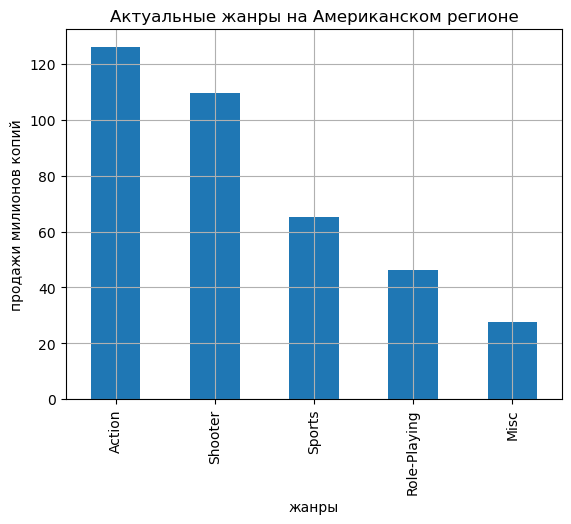

In [155]:
actual_top_5_na_genre.plot(kind='bar', grid=True)
plt.title("Актуальные жанры на Американском регионе")
plt.xlabel("жанры")
plt.ylabel("продажи милионов копий")
plt.show()

In [156]:
actual_top_5_eu_genre = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
actual_top_5_eu_genre

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

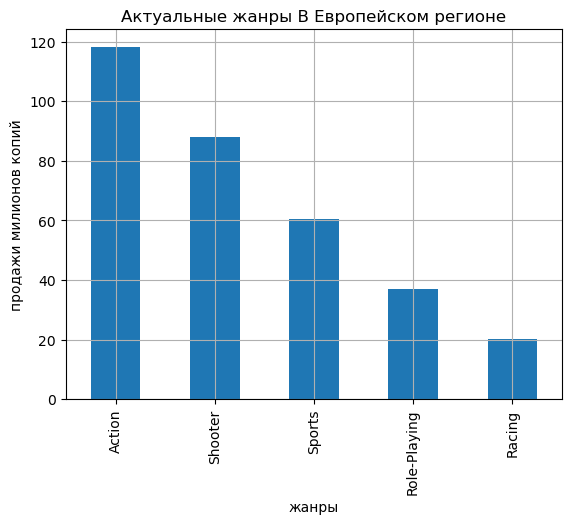

In [157]:
actual_top_5_eu_genre.plot(kind='bar', grid=True)
plt.title("Актуальные жанры В Европейском регионе")
plt.xlabel("жанры")
plt.ylabel("продажи милионов копий")
plt.show()

In [158]:
actual_top_5_jp_genre = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
actual_top_5_jp_genre

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

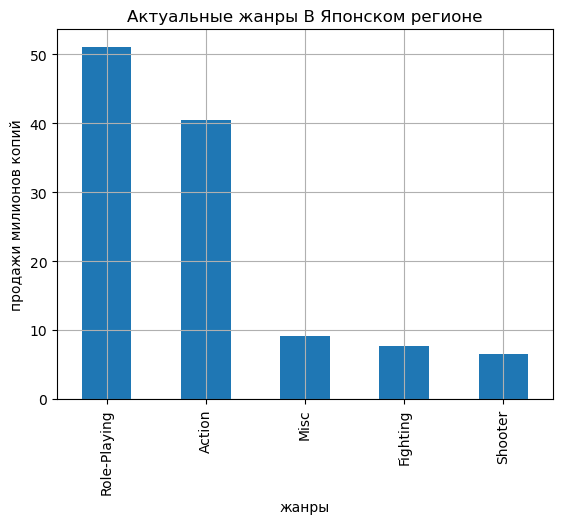

In [159]:
actual_top_5_jp_genre.plot(kind='bar', grid=True)
plt.title("Актуальные жанры В Японском регионе")
plt.xlabel("жанры")
plt.ylabel("продажи милионов копий")
plt.show()

В актуальное время популярность жанров в Европе не кардинально не изменилаись, за исключением поменялись местами жанры Misc и Racing. Американский рынок также затронули небольшие изменения из топ 5 пропал жанр Platform, жанр Misc занял 4е место и поднял в популярности и вышел на 5е место жанр Role-Playing. В японском регионе жанры изменились кардинально. на 1м месте Role-Playing, на ним идут Action, Misc, Sports и заканчивает 5ку жанр Adventure. Эта разница скорее всего возникла из за того, что в Японском регионе преобладают другие платформы, возможно, что со временем в этом регионе игровая культура пошла развиватся в другую сторону. 

### Определите для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [160]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99999,-99999,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52


In [161]:
rating_data = actual_data
rating_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,grup_year_of_release
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05,до 2017
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27,до 2017
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-99999,-99999,no_rating,14.63,до 2017


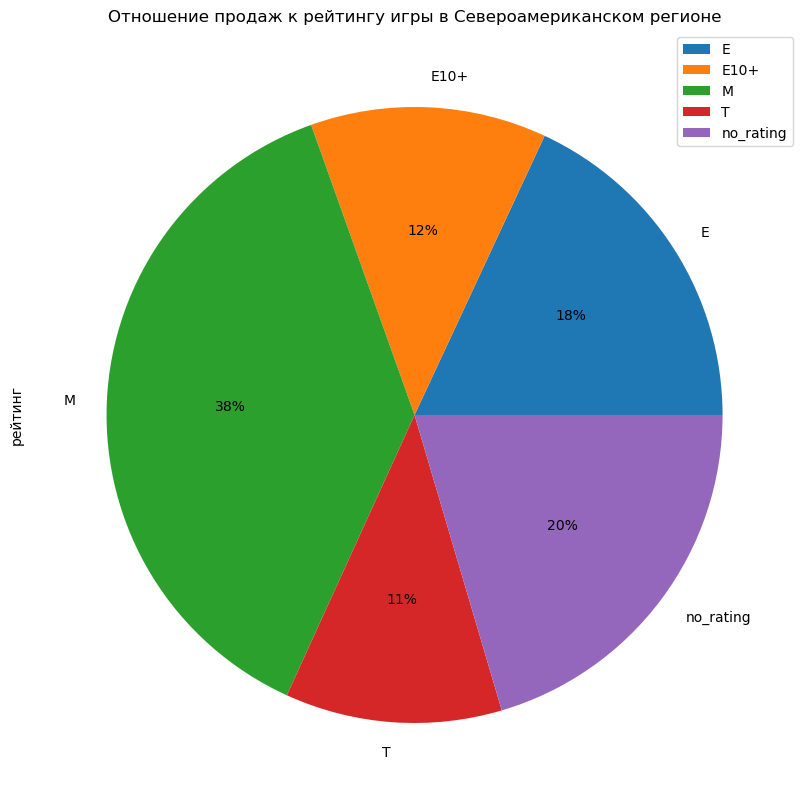

In [162]:
rating_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').\
plot(kind='pie', subplots=True, figsize=(10,10), autopct='%1.0f%%')
plt.title("Отношение продаж к рейтингу игры в Североамериканском регионе")
plt.ylabel("рейтинг")
plt.show()

Text(0, 0.5, 'рейтинг')

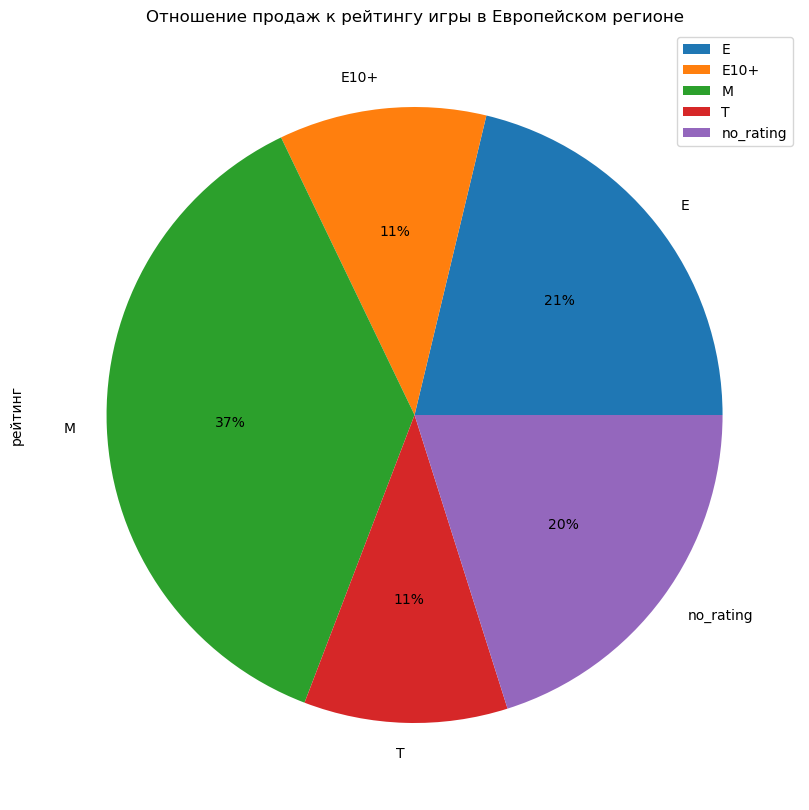

In [163]:
rating_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').\
plot(kind='pie', subplots=True, figsize=(10,10), autopct='%1.0f%%')
plt.title("Отношение продаж к рейтингу игры в Европейском регионе")
plt.ylabel("рейтинг")

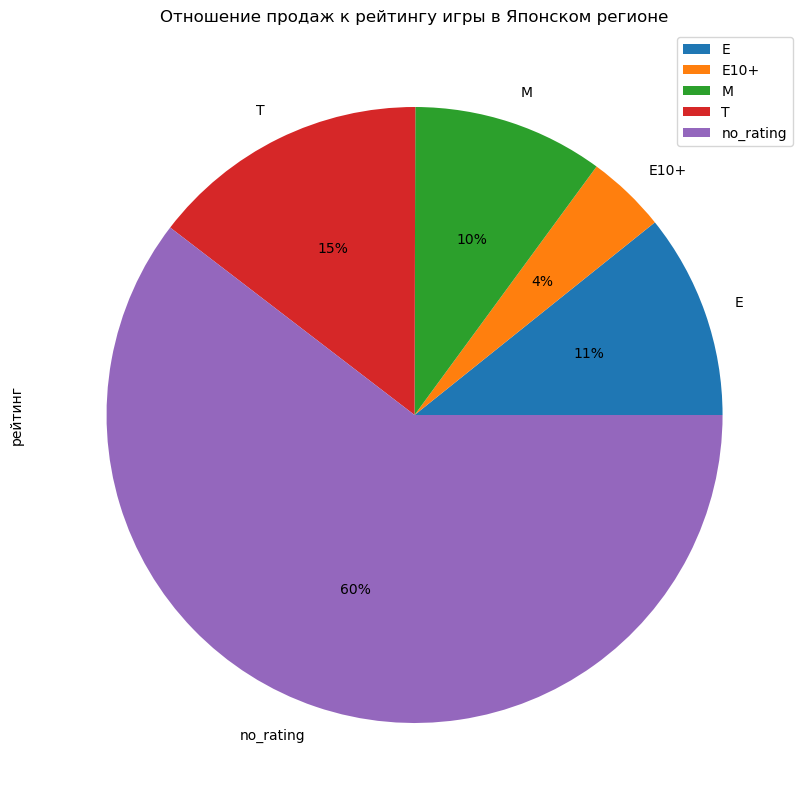

In [164]:
rating_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
.plot(kind='pie', subplots=True, figsize=(10,10), autopct='%1.0f%%')
plt.title("Отношение продаж к рейтингу игры в Японском регионе")
plt.ylabel("рейтинг")
plt.show()

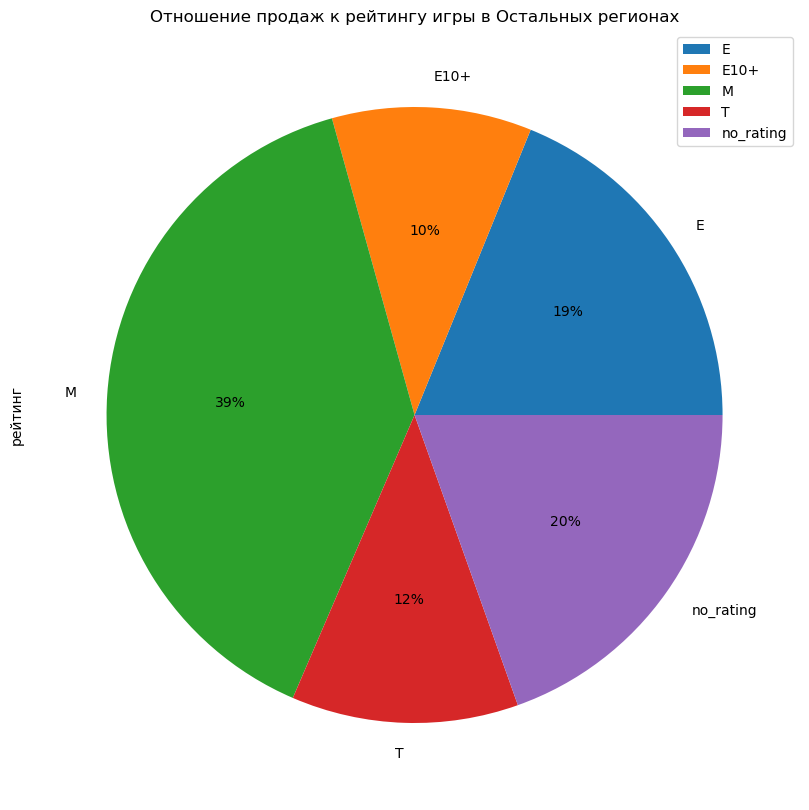

In [165]:
rating_data.pivot_table(index='rating', values='other_sales', aggfunc='sum')\
.plot(kind='pie', subplots=True, figsize=(10,10), autopct='%1.0f%%')
plt.title("Отношение продаж к рейтингу игры в Остальных регионах")
plt.ylabel("рейтинг")
plt.show()

In [166]:
rating_data.pivot_table(index='rating', values=('na_sales','eu_sales','jp_sales','other_sales'), aggfunc=('sum'))

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,83.36,15.14,79.05,22.61
E10+,42.69,5.89,54.24,12.57
M,145.32,14.11,165.21,47.04
T,41.95,20.59,49.79,14.29
no_rating,78.91,85.05,89.42,23.46


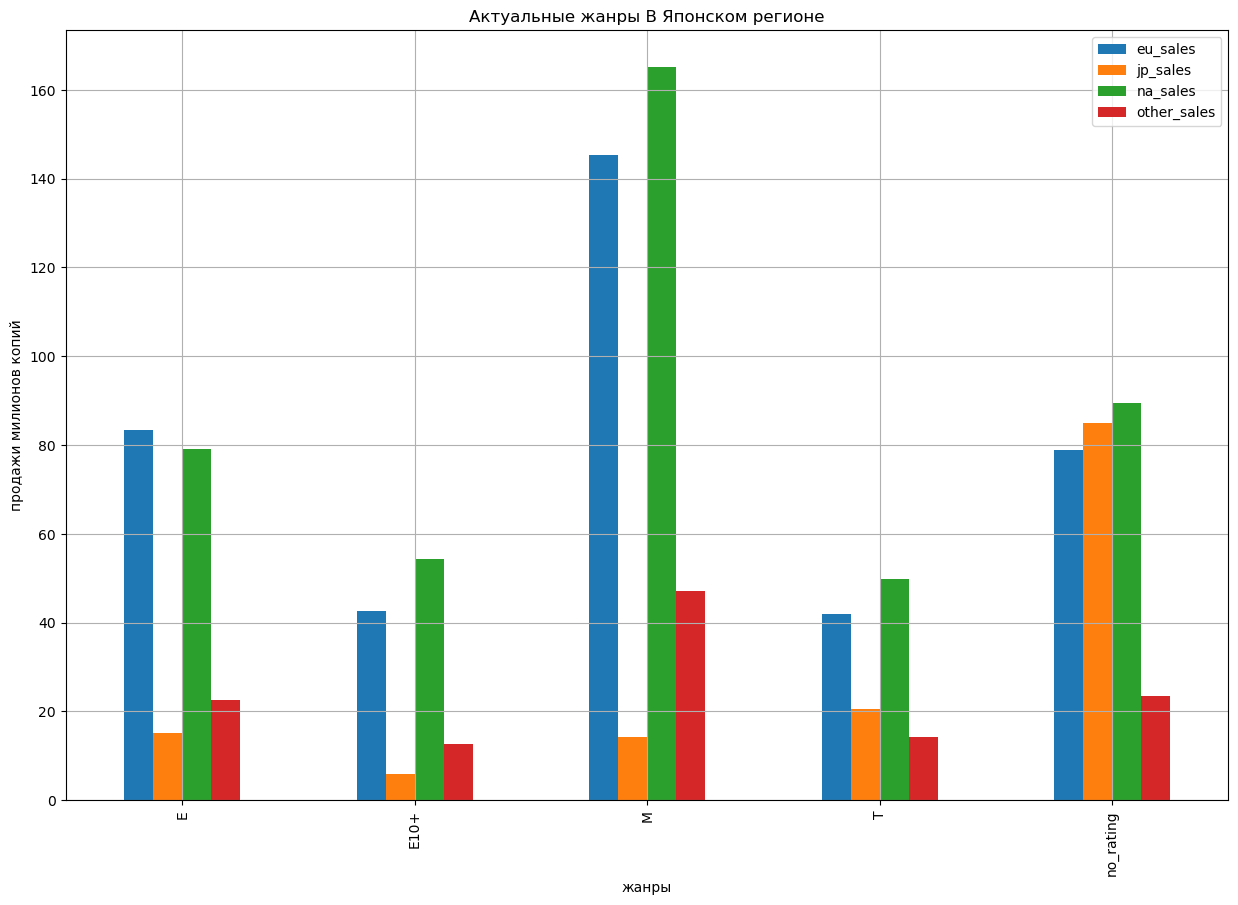

In [167]:
rating_data.pivot_table(index='rating', values=('na_sales','eu_sales','jp_sales','other_sales'), aggfunc=('sum')).plot(kind='bar', grid=True, figsize=(15, 10))
plt.title("Актуальные жанры В Японском регионе")
plt.xlabel("жанры")
plt.ylabel("продажи милионов копий")
plt.show()

Доля проданных игр относительно категории игры в во всех регионах, за исключением Японского, примерно равнва и составляют следующте показатели: "Е" в раене 19%, "Т" в раене 11%, "М" в раене 39% и "Е10+" в раене 11% игре не отмеченые рейтингом составляют 20% в то время как в Японском региионе игр с рейтингом "Е"составляют 11% и "Т" составляет 15%, игры из рейтинга "М" составляет 10% и "Е10+" составляет 4%, а игры без рейтинга составляют 60%

## Шаг 5. Проверьте гипотезы


### Гипотеза 1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;




Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Для проверки гипотез будемприменять метод st.ttest_ind с уровнем значимости в 5%. Так как у нас проверка средних у 2х генеральных совокупностей. Предположим, что средние этих совокупностей равны. были выдвынуты следующие гипотезы:

H0: Средние пользавательские рейтинги платформы Xbox One равны средних пользовательских рейтингов платформы PC.

H1: Средние пользавательские рейтинги платформы Xbox One не равны средним пользовательским рейтингам платформы PC. 

In [168]:
XOne_data = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)].user_score
PC_data = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)].user_score
len(XOne_data)

199

In [169]:
len(PC_data)

157

In [170]:
XOne_data = XOne_data.sample(157)
len(PC_data)

157

In [171]:
sample_1 = XOne_data
sample_2 = PC_data

alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, alternative='two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.07852140477630994
Не получилось отвергнуть нулевую гипотезу


In [172]:
actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)].user_score.mean()

65.7537688442211

In [173]:
actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)].user_score.mean()

62.52229299363057

Вывод: Не получилось отвергнуть нулевую гипотезу. Средние пользавательские рейтинги платформы Xbox One равны средним пользовательским рейтингов платформы PC.

### Гипотеза 2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.


Для проверки гипотез будемприменять метод st.ttest_ind с уровнем значимости в 5%. Так как у нас проверка средних у 2х генеральных совокупностей. Предположим, что средние этих совокупностей равны. были выдвынуты следующие гипотезы:

H0: Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports.

H1: Средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports.

In [174]:
action_data = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)].user_score
sports_data = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)].user_score
len(action_data)

436

In [175]:
len(sports_data)

167

In [176]:
action_data = action_data.sample(167)

In [177]:
sample_1 = action_data
sample_2 = sports_data

alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, alternative='two-sided' )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.6138733390449766e-21
Отвергаем нулевую гипотезу


In [178]:
actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)].user_score.mean()

68.6788990825688

In [179]:
actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)].user_score.mean()

52.31736526946108

Вывод: Отвергаем нулевую гипотезу. H0: Средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports.

## Шаг 6. Общий вывод

В таблице нет явных дублекатов, но есть пропуски в столбцах "Name" и "Genre" по 2 пропуска, в столбце "Year_of_Release" 269 пропусков и больше всего пропусков в столбцах: "Critic_Score", "User_Score" и "Rating". Их количество равно: 8578, 6701 и 6766 соответственно. В именах столббцов присутствуют заглавные буквы. Столбци "Year_of_Release" и "User_Score" не соответствуют своему типу данных.

Удалены 2 строки, у которой почти все данные заполнены NaN.Так как считаю эти данные ошибкой не влияющей на исследование.

в столбце "critic_score" пропуски частично заполннены средними значениями из их таких же игр, но с других платформ, а оставшиеся пропуски заменены на значение "-99999" и тип данных столбца изменен на "int"

в строке "user_score" пропущеные значения били частично заменены на средние значения игры на других платформах, если таких игр не быо,то значения были изменены на значение "-99999", также были найдены 2424 значения "tbd". Преддполагаю, что это значение ошибочное, и так как в столбце "user_score" дискретные математические значения, мной было принято решение заменить значение "tbd" на значение "-88888". А также произведя матиматические действия измененить тип столбца на тип "int", для возможности использования данных в арифмитеческих выражениях.

Не заполнял эти данные не мидианными, не средними значениями, так как от этих данным может меняться мнение об игре. Недостающие данные в столбце "rating" заменены на значение "no_rating", предполагаю, что в эти игры можно играть всем, но в расчетах по рейтингу эти данные использоватся не будут.

Причин появления пропусков в данных может быть много, скорее всего они связаны с тем, что в открытый доступ часто поступают не полные данные.

В наших данных есть записи с 1980 по 2016 год. Больше всего выпущено игр в 2008 год что составляет 8.5%. Меньше всего в 1980м, всего 9 игр что составляет 0.053% Так как до 1993г выпускалось мало игр, моожно считать, что эти данные не актуальны. (выбросы). Количество игр выпущенное с 2000 до 2008 года равно 7417 игр, что составляет 45%, в то время как после 2008 года выпущено 6703 игры, что составляет 40 процентов от всех выпущеных игр.

Платформы с наибольшими продажами, топ 7 платформ, занимают 66% всего рынка видеоигр. Актуальный срок жизни платформы составляет 10 - 12 лет.

Было принято решение считать актуальным, то время в которое выходят игры на современные платформф, так как жижнь платформы примерна равна 10 годам, то и актуальнам будут данные за последние 10 лет. также найдем топ 10 платформ за последние 10 лет. Самой выгодной платформой за актуальное время является PS3 она подала 910.38 милионов копий игр, затем идет X360, с продажами в 901.37 копий, потом Wii 754.03 и DS с продажами в 535.54 милиона копий. PS4 с продажами 314.14, 3DS с продажами 257.81, PSP с продажами 183.31, PS2 с продажами 162.38, PC с продажами	160.57 и замыкает 10ку XOne с продажами	159.32

Из десяти платформ, которые за последние 10 лет продами максимальгое количество копий только 2 платформы показывают потенциальный рост: это платформы XOne и PS4. На них стоит обратить особое внимание. четыре платформы в 2016 году вообще не показали прибыли или очень маленькую прибыль: PSP, PSV, PC и Wii про них стоит забыть, их время ушло. И четыре платформы, которые скоро уйдут, но еще могут принести некоторцю прибыль. это 3DS, WiiU, PS3 и X360.

график "ящик с усами" не показывают картину в целом для платформ по глобальным продажам. И в первую очередь это связано с тем, что "ящик с усами" считает многие проданые игры выбросами, в то время как эти игры принесли платформе основной доход, Максимальная медиана проданых копий принадлежит платформе X360 и составляет 0.265 милиона копий, а доход учитывается со 186 игрр по которым есть данные, в то время как лидер продаж платворма PS4 имеет медиану проданых копий равную 0.2 милоинам и включает данные по 392 проданым играм. Но также мы можем увидеть, что чем жирнее хвостда графике с усами, тем больше продаж у этой платформы.

При исследовании влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Я решил проводить анализ платформы X360. так как это популярная платформа входит в топ 10 и уже прошло ее время, значит по ней представлены данные за весь период жизни платформы.

Есть зависимость между оценками критиков и общим количеством проданных копий игры. кореляция составляет 0,29.
если смотреть корреляцию по регионам, то самоя маленькая кореляция в регионе Японии, самая большая в сставшихся регионах(то есть не в северной Америке и не в Европе)

Зависимости между количеством проданных игр и оценками пользователей нет, в отличие от зависимости с оценками критиков. И составляет 0.0026. Самая большая корреляция, 0.13 в регионе Японии, в остальных регионах корреляция отсутствует.

Если смотреть по другим платформам, то просматривается закономерность между отзывами критиков и количством проданных игр в платфлрах, при условии, что этих игр было продано более 100 едениц. в этих случаях корреляция положительная и более 0.26, за исключением платформы PC, у которой корреляция равна 0.19. Самая большая корреляция у платформы PS4, она равна 0.39 и платформы XOne, она равна 0.37

Но закономерностей между рейтингом игры у пользователей и количеством продаж не выявлено. У некоторых платформ небольшая положительная корреляция, у некоторых небольшая отрицательная корреляция, но чаще всего корреляции не просматривается.

При анализе игр по жанрам модно сказать, что наибольшее медианное значение продаж на всех платформах у игр жанра Shooter и оно равно 0.450 (с большим отрывом), затем идет Sports с 0.240 и Platform с 0.225 неньше всего медиана у Strategy с 0.080, Puzzle и Adventure. Также видно, что у разных платформ рейтинг медианных продаж разный. например у PS3 он практически не отличается от данных по всем платформам и составляют Shooter	0.410, Sports 0.260 и Platform	0.25, а у X360 медианные значения топ 3 продаж составляют Role-Playing 0.490 и Sports 0.430 больше чем у Shooter 0.365

Если смотреть на данные за актуальное время то можно увидеть, что в америке самая популярная платформа PS4 108.74, затем
XOne 93.12, X360 81.66,PS3 63.50 и замыкает 5ку 3DS 38.20  в Европе самая популярная платформа с большим отрывом PS4 141.09, затем идут PS3 67.81, XOne 51.59, X360 42.52 и замыкает 5ку 3DS 30.96. В свою очередь, в Японии самая популярная платформа 3DS    67.81, PS3 23.35, PSV 18.59, PS4 15.96, WiiU 10.88. 

В Европейском как и в Американском регионе доли продаж игр по жанрам распределены следующим образом: Action 30%, Shooter         23%, Sports 15%, Role-Playing 10%, Misc(в Америке) и Racing(в Европе)  6% и оставшиеся игры 16%. В то время как в Японсом регионе доли рынка поделены следующим образом: Role-Playing 36%, Action 29%, Misc 7%, Fighting 5%, Shooter 5% и оставшиеся жанры 18%

Самыми популярными за все время в Европейском и Американском регионе являются следующие жанры: Action, Sports и Shooter, на 4м месте в Америке находится жанр Platform, а в Европе Racing. 5ю строчку в обоих регионах занимают жанр Misc.

Доля проданных игр относительно категории игры в во всех регионах, за исключением Японского, примерно равнва и составляют следующте показатели: "Е" в раене 19%, "Т" в раене 11%, "М" в раене 39% и "Е10+" в раене 11% игре не отмеченые рейтингом составляют 20% в то время как в Японском региионе игр с рейтингом "Е"составляют 11% и "Т" составляет 15%, игры из рейтинга "М" составляет 10% и "Е10+" составляет 4%, а игры без рейтинга составляют 60%

Также были проверены 2 гипотезы:

Гипотеза 1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Так как рейтинги не могут быть абсолютно одинаковыми были выдвынуты следующие гипотезы:

H0: Средние пользавательские рейтинги платформы Xbox One равны средних пользовательских рейтингов платформы PC.

H1: Средние пользавательские рейтинги платформы Xbox One не равны средним пользовательским рейтингам платформы PC.

Применялся метод st.ttest_ind( alternative='greater' )

Вывод: Не получилось отвергнуть нулевую гипотезу. Средние пользавательские рейтинги платформы Xbox One равны средним пользовательским рейтингов платформы PC.

Гипотеза 2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рейтинги у жанров врядли будут одинаковыми, поэтому мы выделяем один из них над другим.

H0: Средние пользовательские рейтинги жанра Action меньше средних пользовательских рейтингов жанра Sports.

H1: Средние пользовательские рейтинги жанра Action больше либо равны равны средним пользовательским рейтингам жанра Sports.

Был использован метод st.ttest_ind( alternative='less' )

Вывод: Не получилось отвергнуть нулевую гипотезу. H0: Средние пользовательские рейтинги жанра Action меньше средних пользовательских рейтингов жанра Sports.

Подводя итоги можно предположить, что стоит обратить особое внимание на 2 платформы показывают потенциальный рост: это платформы XOne и PS4. Наиболее выгодными жанрами будут Shooter, Action, Sports для Североамериканского и Европейскогго региона и Role-Playing или Action для Японского региона. Также игры с рейтингом "М" будут выгодно продаваться во всех регионах.